In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm, skew, probplot
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
import time

from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# Lasso

In [2]:
#from Box_cox_test import X1_test, Y_test
housing = pd.read_csv("~/Desktop/Python_Machine_Learning_Project/ML_Kaggle_Project/housing_new.csv")
train =housing.iloc[:,1:]
train

,SalePrice,PID,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,Electrical__FuseP,Electrical__None,Electrical__SBrkr,GarageFinish__No Garage,GarageFinish__RFn,GarageFinish__Unf,Fence__GdWo,Fence__MnPrv,Fence__MnWw,Fence__No Fence
0,126000,909176150,856,30,0,60.0,7890,1,-0.1,0,...,0,0,1,0,0,1,0,0,0,1
1,139500,905476230,1049,120,0,42.0,4235,1,-0.1,0,...,0,0,1,0,0,0,0,0,0,1
2,124900,911128020,1001,30,0,60.0,6060,1,-0.1,0,...,0,0,1,0,0,1,0,0,0,1
3,114000,535377150,1039,70,0,80.0,8146,1,-0.1,0,...,0,0,1,0,0,1,0,0,0,1
4,227000,534177230,1665,60,0,70.0,8400,1,-0.1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6792,196500,908128100,1724,60,0,62.0,7162,1,-0.1,0,...,0,0,1,0,0,0,0,0,0,1
6793,139600,905402060,1733,20,0,60.0,13680,1,-0.1,1,...,0,0,0,0,0,1,0,0,0,1
6794,145000,909275030,2002,90,0,82.0,6270,1,-0.1,0,...,0,0,0,0,0,1,0,0,0,1
6795,217500,907192040,1842,60,0,60.0,8826,1,-0.1,0,...,0,0,1,0,0,0,0,0,0,1


In [3]:
# rm_cols = ['MSZoning_RL', 'YearRemodAdd', 'TotalBsmtSF', 'LotFrontage']
# X1.drop(rm_cols, axis = 1, inplace = True)
from sklearn.model_selection import train_test_split
X = housing.iloc[:,2:]
# Fit the data against the log og the price
Y = np.log(housing["SalePrice"]+1)
y=Y
ols = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,np.log(housing["SalePrice"]+1), test_size=0.5, random_state=32)


In [4]:
# X1_test.drop(rm_cols, axis = 1, inplace = True)


In [5]:
scaler = StandardScaler().fit(X_train)
features = scaler.transform(X_train)
X1_std = pd.DataFrame(features, columns = X_train.columns)

In [6]:
scaler = StandardScaler().fit(X_test)
features = scaler.transform(X_test)
X1_std_test = pd.DataFrame(features, columns = X_train.columns)

In [7]:
alphas = np.logspace(10,-2,500)

alphas

lassocv = LassoCV(alphas = alphas, random_state=0)
lassocv.fit(X1_std, y_train)


LassoCV(alphas=array([1.00000000e+10, 9.46132376e+09, 8.95166472e+09, 8.46945981e+09,
       8.01323013e+09, 7.58157646e+09, 7.17317494e+09, 6.78677305e+09,
       6.42118571e+09, 6.07529169e+09, 5.74803016e+09, 5.43839743e+09,
       5.14544388e+09, 4.86827104e+09, 4.60602884e+09, 4.35791301e+09,
       4.12316259e+09, 3.90105762e+09, 3.69091691e+09, 3.49209598e+09,
       3.30398507e+09, 3.12600724e+0...
       3.57360225e-02, 3.38110078e-02, 3.19896892e-02, 3.02664806e-02,
       2.86360972e-02, 2.70935387e-02, 2.56340741e-02, 2.42532274e-02,
       2.29467637e-02, 2.17106760e-02, 2.05411735e-02, 1.94346693e-02,
       1.83877698e-02, 1.73972643e-02, 1.64601150e-02, 1.55734477e-02,
       1.47345431e-02, 1.39408283e-02, 1.31898690e-02, 1.24793621e-02,
       1.18071285e-02, 1.11711065e-02, 1.05693455e-02, 1.00000000e-02]),
        random_state=0)

In [8]:
lassocv.score(X1_std,y_train)

0.9341900385228192

In [9]:
lassocv_alpha = lassocv.alpha_

In [10]:
lassocv_alpha

0.01

In [11]:
las = Lasso(alpha = lassocv.alpha_, random_state = 0)
las.fit(X1_std,y_train)

Lasso(alpha=0.01, random_state=0)

In [12]:
print('Score for training data:', las.score(X1_std,y_train))

pred = las.predict(X1_std)
RMSE = mean_squared_error(y_train, pred, squared = False)
print('RMSE for training data is:', RMSE)

Score for training data: 0.9341900385228192
RMSE for training data is: 0.10479942158384745


In [13]:
print('Score for test data:', las.score(X1_std_test,y_test))

pred = las.predict(X1_std_test)
RMSE = mean_squared_error(y_test, pred, squared = False)
print('RMSE for test data is:', RMSE)

Score for test data: 0.9338761128935922
RMSE for test data is: 0.10584008623767499


In [14]:
lasso_score = las.score(X1_std_test,y_test)
lasso_rmse = mean_squared_error(y_test, pred, squared = False)

In [15]:
import pickle
Pkl_Filename = "Pickle_lasso.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(las, file)

# Decision Tree

In [16]:
# Initializing Decision Tree
tree_reg = DecisionTreeRegressor()
tree = tree_reg.fit(X_train, y_train)

In [17]:
# Predicting Price/Sqft
Y_pred = tree_reg.predict(X_train)

# Printing error and score of overfit decision tree model
RMSE = np.sqrt(mean_squared_error(y_train,Y_pred))
print(RMSE)
R2 = tree_reg.score(X_test,y_test)
print(R2)

4.86656664361147e-15
0.9398031900274982


In [18]:
# Calculating cross validation scores
scores = cross_validate(tree_reg, X_train, y_train, cv = 20, scoring = ('r2','neg_mean_squared_error'))
scores

{'fit_time': array([0.05566812, 0.05588412, 0.05404806, 0.05267906, 0.05272388,
        0.05500388, 0.05661821, 0.04668403, 0.05150795, 0.0538528 ,
        0.051687  , 0.04936218, 0.05331588, 0.04672503, 0.05421495,
        0.05181408, 0.05664277, 0.05218792, 0.05607605, 0.05309963]),
 'score_time': array([0.00176597, 0.00167799, 0.0017159 , 0.00167513, 0.00169516,
        0.00169611, 0.00167203, 0.00167394, 0.0045433 , 0.00159526,
        0.00168085, 0.00409412, 0.00166512, 0.00166202, 0.00164199,
        0.00167394, 0.00334001, 0.00172997, 0.00167203, 0.00167823]),
 'test_r2': array([0.93742192, 0.88790062, 0.93941959, 0.93044368, 0.94368073,
        0.89759996, 0.95132125, 0.91448024, 0.89904071, 0.94029535,
        0.92948666, 0.95635799, 0.94451824, 0.97132931, 0.90541798,
        0.94062776, 0.93003358, 0.93922807, 0.92408696, 0.89613619]),
 'test_neg_mean_squared_error': array([-0.01187177, -0.01577853, -0.01024971, -0.00992119, -0.00905411,
        -0.01645188, -0.00897111, -0.

In [19]:
np.linspace(start=2, stop=30, num=15, dtype=int)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])

In [20]:
# Gridsearch with cross valiadation

grid_para_tree = [{
    "min_samples_leaf": range(1,16),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}]
tree_reg.set_params(random_state=108)
grid_search_tree = GridSearchCV(
    tree_reg, grid_para_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

%time grid_search_tree.fit(X_train, y_train)

CPU times: user 1.84 s, sys: 570 ms, total: 2.41 s
Wall time: 13.6 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=108), n_jobs=-1,
             param_grid=[{'min_samples_leaf': range(1, 16),
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])}],
             scoring='neg_mean_squared_error')

In [21]:
# RETURNS a DATA FRAME BUT DOES NOT FIT BEST ESTIMATE BACK TO DATA. 
# CANT BE RUN WITH refit = True because there are two scoring methods, and it does not know which one to use.

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           #"max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
tuning_model = GridSearchCV(tree_reg, param_grid = parameters,
                            scoring = ['r2', 'neg_mean_squared_error'], refit = False, cv = 3, verbose = 3)


tuning_model.fit(X_train, y_train)

Results = pd.DataFrame(tuning_model.cv_results_)

Fitting 3 folds for each of 1400 candidates, totalling 4200 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.467) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.089) r2: (test=0.459) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.487) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.096) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.109) r2: (test=0.337) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.107) r2: (test=0.375) total time= 

[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.096) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.109) r2: (test=0.337) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.107) r2: (test=0.375) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.467) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.089) r2: (test=0.459) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.487) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, split

[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.487) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.096) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.109) r2: (test=0.337) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.107) r2: (test=0.375) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.467) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.089) r2: (test=0.459) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, s

[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.487) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.096) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.109) r2: (test=0.337) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.107) r2: (test=0.375) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.467) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.089) r2: (test=0.459) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, split

[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.089) r2: (test=0.459) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.487) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.096) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.109) r2: (test=0.337) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.107) r2: (test=0.375) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.467) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=5, split

[CV 1/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.467) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.089) r2: (test=0.459) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.487) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.096) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.109) r2: (test=0.337) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.107) r2: (test=0.375) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=7, split

[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.089) r2: (test=0.459) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.487) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.096) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.109) r2: (test=0.337) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.107) r2: (test=0.375) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.467) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=7, split

[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.096) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.109) r2: (test=0.337) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.107) r2: (test=0.375) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.467) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.089) r2: (test=0.459) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.487) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=6, split

[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.096) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.109) r2: (test=0.337) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.107) r2: (test=0.375) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.467) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.089) r2: (test=0.459) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.487) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=5, split

[CV 3/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.487) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.096) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.109) r2: (test=0.337) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.107) r2: (test=0.375) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.088) r2: (test=0.467) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.089) r2: (test=0.459) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=5, split

[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.030) r2: (test=0.818) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.813) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.050) r2: (test=0.698) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.050) r2: (test=0.698) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.051) r2: (test=0.702) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.037) r2: (test=0.777) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples

[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.813) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.681) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.049) r2: (test=0.700) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.697) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.037) r2: (test=0.777) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.030) r2: (test=0.818) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=7, split

[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.030) r2: (test=0.818) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.813) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.681) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.049) r2: (test=0.700) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.697) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.037) r2: (test=0.777) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=7, split

[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.813) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.681) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.049) r2: (test=0.700) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.697) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.037) r2: (test=0.777) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.030) r2: (test=0.818) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=6, split

[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.049) r2: (test=0.700) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.697) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.037) r2: (test=0.777) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.030) r2: (test=0.818) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.813) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.681) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=5, split

[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.049) r2: (test=0.700) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.697) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.037) r2: (test=0.777) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.030) r2: (test=0.818) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.813) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.681) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=7, split

[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.813) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.681) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.049) r2: (test=0.700) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.697) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.037) r2: (test=0.777) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.030) r2: (test=0.818) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=7, split

[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.037) r2: (test=0.777) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.030) r2: (test=0.818) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.813) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.681) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.049) r2: (test=0.700) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.697) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=7, split

[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.049) r2: (test=0.700) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.697) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.037) r2: (test=0.777) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.030) r2: (test=0.818) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.813) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.681) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=6, split

[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.037) r2: (test=0.777) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.030) r2: (test=0.818) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.813) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.681) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.049) r2: (test=0.700) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.052) r2: (test=0.697) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=6, split

[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.885) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.907) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.894) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.029) r2: (test=0.826) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.028) r2: (test=0.832) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.027) r2: (test=0.840) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples

[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.038) r2: (test=0.778) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.806) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.831) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.834) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.043) r2: (test=0.736) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.036) r2: (test=0.781) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, split

[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.891) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.889) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.030) r2: (test=0.817) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.025) r2: (test=0.851) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.027) r2: (test=0.844) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.020) r2: (test=0.879) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, split

[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.023) r2: (test=0.859) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.025) r2: (test=0.852) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.886) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.907) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.894) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.027) r2: (test=0.833) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=4, split

[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.894) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.027) r2: (test=0.833) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.023) r2: (test=0.859) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.025) r2: (test=0.852) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.886) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.907) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=4, split

[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.023) r2: (test=0.859) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.025) r2: (test=0.852) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.886) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.907) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.894) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.027) r2: (test=0.833) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=4, split

[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.023) r2: (test=0.859) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.025) r2: (test=0.852) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.886) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.907) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.894) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.027) r2: (test=0.833) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=4, split

[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.886) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.907) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.894) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.027) r2: (test=0.833) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.023) r2: (test=0.859) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.025) r2: (test=0.852) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=4, split

[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.886) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.907) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.894) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.027) r2: (test=0.833) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.023) r2: (test=0.859) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.025) r2: (test=0.852) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=4, split

[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.887) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.907) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.894) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.027) r2: (test=0.833) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.023) r2: (test=0.859) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.025) r2: (test=0.852) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=3, split

[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.894) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.905) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.923) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.941) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.927) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.018) r2: (test=0.891) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples

[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.834) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.043) r2: (test=0.736) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.036) r2: (test=0.781) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.038) r2: (test=0.778) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.806) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.831) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=3, split

[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.024) r2: (test=0.857) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.026) r2: (test=0.847) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.020) r2: (test=0.880) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.891) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.889) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.026) r2: (test=0.843) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=3, split

[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.899) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.910) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.901) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.022) r2: (test=0.863) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.020) r2: (test=0.879) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.890) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=3, split

[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.910) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.921) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.914) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.020) r2: (test=0.878) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.904) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.901) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=3, split

[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.933) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.924) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.020) r2: (test=0.879) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.911) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.909) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.922) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=3, split

[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.884) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.914) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.913) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.927) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.936) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.923) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=3, split

[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.914) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.913) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.928) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.938) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.924) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.886) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=3, split

[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.885) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.914) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.913) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.928) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.938) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.921) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=3, split

[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.927) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.885) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.914) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.913) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.928) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.940) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=3, split

[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.009) r2: (test=0.944) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.939) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.914) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.012) r2: (test=0.927) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.011) r2: (test=0.936) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.936) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples

[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.834) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.043) r2: (test=0.736) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.036) r2: (test=0.781) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.038) r2: (test=0.778) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.806) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.831) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=2, split

[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.020) r2: (test=0.880) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.891) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.889) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.026) r2: (test=0.843) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.024) r2: (test=0.857) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.026) r2: (test=0.847) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=3, split

[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.022) r2: (test=0.867) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.020) r2: (test=0.881) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.018) r2: (test=0.896) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.899) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.910) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.901) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=3, split

[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.908) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.911) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.921) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.914) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.018) r2: (test=0.888) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.902) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=2, split

[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.014) r2: (test=0.920) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.894) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.914) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.911) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.923) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.933) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=2, split

[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.927) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.899) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.921) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.915) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.930) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.936) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=2, split

[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.931) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.903) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.012) r2: (test=0.925) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.917) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.935) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.939) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=2, split

[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.933) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.900) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.918) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.919) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.934) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.941) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=1, s

[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.936) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.907) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.012) r2: (test=0.924) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.910) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.924) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.934) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=10, sp

[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.939) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.941) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.908) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.920) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.917) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.930) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=9, split

[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.934) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.938) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.942) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.915) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.920) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.924) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_

[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.043) r2: (test=0.736) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.036) r2: (test=0.781) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.038) r2: (test=0.778) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.806) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.831) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.834) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=7

[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.020) r2: (test=0.880) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.891) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.889) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.028) r2: (test=0.828) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.024) r2: (test=0.857) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.028) r2: (test=0.837) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=7

[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.901) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.022) r2: (test=0.866) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.020) r2: (test=0.881) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.021) r2: (test=0.878) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.899) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.908) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=6

[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.915) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.883) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.899) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.891) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.911) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.014) r2: (test=0.918) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=6

[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.920) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.931) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.923) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.899) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.909) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.900) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=6

[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.931) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.902) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.916) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.904) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.924) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.935) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=6

[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.908) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.921) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.925) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.932) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.936) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.933) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=5

[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.914) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.012) r2: (test=0.924) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.012) r2: (test=0.929) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.931) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.936) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.938) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=5

[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.931) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.912) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.012) r2: (test=0.929) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.011) r2: (test=0.935) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.937) total time=   0.1s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.940) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=4

[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.939) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.938) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.932) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.912) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.915) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.011) r2: (test=0.938) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_

[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.036) r2: (test=0.781) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.038) r2: (test=0.778) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.806) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.831) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.834) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.043) r2: (test=0.736) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=4

[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.026) r2: (test=0.847) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.020) r2: (test=0.880) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.891) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.889) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.028) r2: (test=0.828) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.024) r2: (test=0.857) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=5

[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.899) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.910) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.901) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.022) r2: (test=0.866) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.020) r2: (test=0.881) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.021) r2: (test=0.878) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=6

[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.911) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.920) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.915) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.883) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.899) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.891) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=6

[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.932) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.922) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.902) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.908) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.916) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.920) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=5

[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.936) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.931) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.910) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.916) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.921) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.930) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=4

[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.927) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.937) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.938) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.932) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.910) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.920) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=4

[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.939) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.935) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.915) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.922) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.012) r2: (test=0.929) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.931) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=5

[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.936) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.920) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.923) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.012) r2: (test=0.931) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.931) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.936) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=5

In [22]:
# Sorting by best r-squared
Results[['mean_test_r2','rank_test_r2']].sort_values(by = 'rank_test_r2')

,mean_test_r2,rank_test_r2
802,0.940150,1
1214,0.939871,2
1014,0.939715,3
814,0.938947,4
1202,0.938787,5
...,...,...
89,0.375515,1301
91,0.375515,1301
153,0.375515,1301
95,0.375515,1301


In [23]:
# Sorting by best r-squared with errors
rr = Results[['mean_test_r2','rank_test_r2',
        'mean_test_neg_mean_squared_error',
        'std_test_neg_mean_squared_error',
        'rank_test_neg_mean_squared_error']].sort_values(by = 'rank_test_neg_mean_squared_error')
rr['mean_test_neg_mean_squared_error'] = np.sqrt(-rr['mean_test_neg_mean_squared_error'])

rr

,mean_test_r2,rank_test_r2,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error
802,0.940150,1,0.099903,0.000528,1
1214,0.939871,2,0.100097,0.000580,2
1014,0.939715,3,0.100224,0.000508,3
814,0.938947,4,0.100856,0.000713,4
1202,0.938787,5,0.100986,0.000344,5
...,...,...,...,...,...
89,0.375515,1301,0.322708,0.005705,1301
91,0.375515,1301,0.322708,0.005705,1301
153,0.375515,1301,0.322708,0.005705,1301
95,0.375515,1301,0.322708,0.005705,1301


In [24]:
# Working grid search and cross validation


parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           #"max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
tmtm = GridSearchCV(tree_reg, param_grid = parameters,
                            scoring = 'neg_mean_squared_error', cv = 3, verbose = 3, 
                    return_train_score = True)


tmtm.fit(X_train, y_train)

Fitting 3 folds for each of 1400 candidates, totalling 4200 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-0.087, test=-0.088) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-0.086, test=-0.089) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-0.086, test=-0.088) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-0.089, test=-0.096) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-0.104, test=-0.109) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-0.106, test=-0.107) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=(train=-0.087, test=-0.0

[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, splitter=random;, score=(train=-0.089, test=-0.096) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, splitter=random;, score=(train=-0.104, test=-0.109) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, splitter=random;, score=(train=-0.106, test=-0.107) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=(train=-0.087, test=-0.088) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=(train=-0.086, test=-0.089) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=(train=-0.086, test=-0.088) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=(train=-0.089, test=-0.096) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_sampl

[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=(train=-0.106, test=-0.107) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=(train=-0.087, test=-0.088) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=(train=-0.086, test=-0.089) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=(train=-0.086, test=-0.088) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=(train=-0.089, test=-0.096) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=(train=-0.104, test=-0.109) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=(train=-0.106, test=-0.107) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=20, min_sampl

[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=(train=-0.087, test=-0.088) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=(train=-0.086, test=-0.089) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=(train=-0.086, test=-0.088) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=(train=-0.089, test=-0.096) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=(train=-0.104, test=-0.109) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=(train=-0.106, test=-0.107) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=6, splitter=best;, score=(train=-0.087, test=-0.088) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples

[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=6, splitter=best;, score=(train=-0.086, test=-0.089) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=6, splitter=best;, score=(train=-0.086, test=-0.088) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=(train=-0.089, test=-0.096) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=(train=-0.104, test=-0.109) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=(train=-0.106, test=-0.107) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=7, splitter=best;, score=(train=-0.087, test=-0.088) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=7, splitter=best;, score=(train=-0.086, test=-0.089) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples

[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=8, splitter=best;, score=(train=-0.086, test=-0.088) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=8, splitter=random;, score=(train=-0.089, test=-0.096) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=8, splitter=random;, score=(train=-0.104, test=-0.109) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=8, splitter=random;, score=(train=-0.106, test=-0.107) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=9, splitter=best;, score=(train=-0.087, test=-0.088) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=9, splitter=best;, score=(train=-0.086, test=-0.089) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=9, splitter=best;, score=(train=-0.086, test=-0.088) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=50, min_samples

[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=9, splitter=random;, score=(train=-0.089, test=-0.096) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=9, splitter=random;, score=(train=-0.104, test=-0.109) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=9, splitter=random;, score=(train=-0.106, test=-0.107) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=10, splitter=best;, score=(train=-0.087, test=-0.088) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=10, splitter=best;, score=(train=-0.086, test=-0.089) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=10, splitter=best;, score=(train=-0.086, test=-0.088) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=10, splitter=random;, score=(train=-0.089, test=-0.096) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_s

[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=1, splitter=random;, score=(train=-0.106, test=-0.107) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=2, splitter=best;, score=(train=-0.087, test=-0.088) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=2, splitter=best;, score=(train=-0.086, test=-0.089) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=2, splitter=best;, score=(train=-0.086, test=-0.088) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-0.089, test=-0.096) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-0.104, test=-0.109) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-0.106, test=-0.107) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_sampl

[CV 1/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=2, splitter=random;, score=(train=-0.089, test=-0.096) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=2, splitter=random;, score=(train=-0.104, test=-0.109) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=2, splitter=random;, score=(train=-0.106, test=-0.107) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=3, splitter=best;, score=(train=-0.087, test=-0.088) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=3, splitter=best;, score=(train=-0.086, test=-0.089) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=3, splitter=best;, score=(train=-0.086, test=-0.088) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=(train=-0.089, test=-0.096) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_sampl

[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=(train=-0.032, test=-0.037) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=(train=-0.030, test=-0.030) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=(train=-0.029, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=(train=-0.041, test=-0.050) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=(train=-0.048, test=-0.050) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=(train=-0.045, test=-0.051) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=(train=-0.032, test=-0.037) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=N

[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=(train=-0.030, test=-0.030) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=(train=-0.029, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=4, splitter=random;, score=(train=-0.044, test=-0.052) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=4, splitter=random;, score=(train=-0.046, test=-0.049) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=4, splitter=random;, score=(train=-0.048, test=-0.052) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=(train=-0.032, test=-0.037) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=(train=-0.030, test=-0.030) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples

[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, splitter=random;, score=(train=-0.046, test=-0.049) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, splitter=random;, score=(train=-0.048, test=-0.052) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=6, splitter=best;, score=(train=-0.032, test=-0.037) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=6, splitter=best;, score=(train=-0.030, test=-0.030) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=6, splitter=best;, score=(train=-0.029, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=(train=-0.044, test=-0.052) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=(train=-0.046, test=-0.049) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_sampl

[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=6, splitter=random;, score=(train=-0.048, test=-0.052) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=7, splitter=best;, score=(train=-0.032, test=-0.037) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=7, splitter=best;, score=(train=-0.030, test=-0.030) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=7, splitter=best;, score=(train=-0.029, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=7, splitter=random;, score=(train=-0.044, test=-0.052) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=7, splitter=random;, score=(train=-0.046, test=-0.049) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=7, splitter=random;, score=(train=-0.048, test=-0.052) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_sampl

[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=8, splitter=best;, score=(train=-0.032, test=-0.037) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=8, splitter=best;, score=(train=-0.030, test=-0.030) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=8, splitter=best;, score=(train=-0.029, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=8, splitter=random;, score=(train=-0.044, test=-0.052) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=8, splitter=random;, score=(train=-0.046, test=-0.049) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=8, splitter=random;, score=(train=-0.048, test=-0.052) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=9, splitter=best;, score=(train=-0.032, test=-0.037) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples

[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=9, splitter=best;, score=(train=-0.029, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=9, splitter=random;, score=(train=-0.044, test=-0.052) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=9, splitter=random;, score=(train=-0.046, test=-0.049) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=9, splitter=random;, score=(train=-0.048, test=-0.052) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=10, splitter=best;, score=(train=-0.032, test=-0.037) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=10, splitter=best;, score=(train=-0.030, test=-0.030) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=10, splitter=best;, score=(train=-0.029, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samp

[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=(train=-0.029, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(train=-0.044, test=-0.052) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(train=-0.046, test=-0.049) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(train=-0.048, test=-0.052) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(train=-0.032, test=-0.037) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(train=-0.030, test=-0.030) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(train=-0.029, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples

[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=2, splitter=best;, score=(train=-0.029, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-0.044, test=-0.052) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-0.046, test=-0.049) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-0.048, test=-0.052) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-0.032, test=-0.037) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-0.030, test=-0.030) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-0.029, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples

[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=(train=-0.030, test=-0.030) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=(train=-0.029, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=4, splitter=random;, score=(train=-0.044, test=-0.052) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=4, splitter=random;, score=(train=-0.046, test=-0.049) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=4, splitter=random;, score=(train=-0.048, test=-0.052) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=5, splitter=best;, score=(train=-0.032, test=-0.037) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=5, splitter=best;, score=(train=-0.030, test=-0.030) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples

[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, splitter=random;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, splitter=random;, score=(train=-0.026, test=-0.028) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, splitter=random;, score=(train=-0.022, test=-0.027) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=6, splitter=best;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=6, splitter=best;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=6, splitter=best;, score=(train=-0.013, test=-0.018) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=6, splitter=random;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes

[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=(train=-0.027, test=-0.032) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=(train=-0.026, test=-0.028) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=(train=-0.025, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=6, splitter=random;, score=(train=-0.038, test=-0.043) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=6, splitter=random;, score=(train=-0.035, test=-0.036) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=6, splitter=random;, score=(train=-0.034, test=-0.038) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=7, splitter=best;, score=(train=-0.027, test=-0.032) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples

[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=(train=-0.023, test=-0.025) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=(train=-0.024, test=-0.027) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=7, splitter=best;, score=(train=-0.018, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=7, splitter=best;, score=(train=-0.016, test=-0.018) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=7, splitter=best;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=7, splitter=random;, score=(train=-0.025, test=-0.029) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=7, splitter=random;, score=(train=-0.023, test=-0.025) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_sampl

[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=7, splitter=best;, score=(train=-0.016, test=-0.018) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=7, splitter=best;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=7, splitter=best;, score=(train=-0.013, test=-0.018) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=7, splitter=random;, score=(train=-0.023, test=-0.026) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=7, splitter=random;, score=(train=-0.021, test=-0.024) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=7, splitter=random;, score=(train=-0.023, test=-0.026) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=8, splitter=best;, score=(train=-0.017, test=-0.019) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples

[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=7, splitter=best;, score=(train=-0.013, test=-0.018) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=7, splitter=random;, score=(train=-0.023, test=-0.026) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=7, splitter=random;, score=(train=-0.021, test=-0.024) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=7, splitter=random;, score=(train=-0.023, test=-0.026) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=8, splitter=best;, score=(train=-0.017, test=-0.019) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=8, splitter=best;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=8, splitter=best;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples

[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=8, splitter=best;, score=(train=-0.017, test=-0.019) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=8, splitter=best;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=8, splitter=best;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=8, splitter=random;, score=(train=-0.023, test=-0.026) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=8, splitter=random;, score=(train=-0.021, test=-0.024) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=8, splitter=random;, score=(train=-0.023, test=-0.026) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=9, splitter=best;, score=(train=-0.017, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples

[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=9, splitter=random;, score=(train=-0.022, test=-0.024) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=9, splitter=random;, score=(train=-0.023, test=-0.026) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=10, splitter=best;, score=(train=-0.017, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=10, splitter=best;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=10, splitter=best;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=10, splitter=random;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=10, splitter=random;, score=(train=-0.022, test=-0.025) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_

[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=9, splitter=random;, score=(train=-0.023, test=-0.026) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=best;, score=(train=-0.017, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=best;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=best;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=random;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=random;, score=(train=-0.022, test=-0.025) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=random;, score=(train=-0.024, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min

[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=10, splitter=best;, score=(train=-0.017, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=10, splitter=best;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=10, splitter=best;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=10, splitter=random;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=10, splitter=random;, score=(train=-0.022, test=-0.025) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=10, splitter=random;, score=(train=-0.024, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=1, splitter=best;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_s

[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=10, splitter=best;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=10, splitter=random;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=10, splitter=random;, score=(train=-0.022, test=-0.025) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=10, splitter=random;, score=(train=-0.024, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-0.006, test=-0.012) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-0.005, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-0.005, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None,

[CV 2/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=(train=-0.026, test=-0.028) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=(train=-0.025, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=(train=-0.038, test=-0.043) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=(train=-0.035, test=-0.036) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=(train=-0.034, test=-0.038) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=2, splitter=best;, score=(train=-0.027, test=-0.032) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=2, splitter=best;, score=(train=-0.026, test=-0.028) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples

[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=(train=-0.017, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=(train=-0.016, test=-0.018) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=(train=-0.023, test=-0.026) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=(train=-0.022, test=-0.024) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=(train=-0.022, test=-0.026) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=(train=-0.017, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples

[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;, score=(train=-0.017, test=-0.020) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=(train=-0.012, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=(train=-0.012, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=(train=-0.017, test=-0.022) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=(train=-0.017, test=-0.019) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_sampl

[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=3, splitter=best;, score=(train=-0.009, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=3, splitter=best;, score=(train=-0.009, test=-0.015) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=3, splitter=random;, score=(train=-0.015, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=3, splitter=random;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=3, splitter=random;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=4, splitter=best;, score=(train=-0.010, test=-0.015) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=4, splitter=best;, score=(train=-0.009, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples

[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=4, splitter=best;, score=(train=-0.008, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=4, splitter=random;, score=(train=-0.013, test=-0.019) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=4, splitter=random;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=4, splitter=random;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=(train=-0.008, test=-0.014) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=(train=-0.008, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples

[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=5, splitter=best;, score=(train=-0.007, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=5, splitter=random;, score=(train=-0.012, test=-0.019) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=5, splitter=random;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=5, splitter=random;, score=(train=-0.012, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=6, splitter=best;, score=(train=-0.007, test=-0.013) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=6, splitter=best;, score=(train=-0.007, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=6, splitter=best;, score=(train=-0.007, test=-0.014) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples

[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=(train=-0.006, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=(train=-0.006, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=(train=-0.012, test=-0.019) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=(train=-0.012, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=7, splitter=best;, score=(train=-0.007, test=-0.013) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=7, splitter=best;, score=(train=-0.007, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples

[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=7, splitter=best;, score=(train=-0.007, test=-0.013) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=7, splitter=best;, score=(train=-0.006, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=7, splitter=best;, score=(train=-0.006, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=7, splitter=random;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=7, splitter=random;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=7, splitter=random;, score=(train=-0.012, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=8, splitter=best;, score=(train=-0.007, test=-0.013) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples

[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=7, splitter=random;, score=(train=-0.012, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=8, splitter=best;, score=(train=-0.007, test=-0.013) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=8, splitter=best;, score=(train=-0.007, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=8, splitter=best;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=8, splitter=random;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=8, splitter=random;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=8, splitter=random;, score=(train=-0.012, test=-0.018) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_sampl

[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=8, splitter=best;, score=(train=-0.005, test=-0.011) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=8, splitter=best;, score=(train=-0.005, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=8, splitter=best;, score=(train=-0.005, test=-0.010) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=8, splitter=random;, score=(train=-0.008, test=-0.013) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=8, splitter=random;, score=(train=-0.011, test=-0.016) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=8, splitter=random;, score=(train=-0.008, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=9, splitter=best;, score=(train=-0.005, test=-0.011) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=N

[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=random;, score=(train=-0.035, test=-0.036) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=random;, score=(train=-0.034, test=-0.038) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=best;, score=(train=-0.027, test=-0.032) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=best;, score=(train=-0.026, test=-0.028) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=best;, score=(train=-0.025, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=random;, score=(train=-0.038, test=-0.043) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=random;, score=(train=-0.035, test=-0.036) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_sampl

[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=10, splitter=random;, score=(train=-0.024, test=-0.031) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=10, splitter=random;, score=(train=-0.022, test=-0.024) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=10, splitter=random;, score=(train=-0.022, test=-0.026) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=(train=-0.012, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=(train=-0.012, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=(train=-0.017, test=-0.022) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_sa

[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=-0.010, test=-0.015) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=-0.009, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=-0.009, test=-0.015) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=2, splitter=random;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=2, splitter=random;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=2, splitter=random;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_sampl

[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=2, splitter=random;, score=(train=-0.011, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=2, splitter=random;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=2, splitter=random;, score=(train=-0.011, test=-0.015) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=(train=-0.008, test=-0.013) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=(train=-0.008, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=3, splitter=random;, score=(train=-0.012, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_sampl

[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=3, splitter=best;, score=(train=-0.007, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=3, splitter=best;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=3, splitter=random;, score=(train=-0.010, test=-0.016) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=3, splitter=random;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=3, splitter=random;, score=(train=-0.009, test=-0.014) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=4, splitter=best;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=4, splitter=best;, score=(train=-0.007, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples

[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=4, splitter=best;, score=(train=-0.006, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=4, splitter=random;, score=(train=-0.010, test=-0.016) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=4, splitter=random;, score=(train=-0.009, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=4, splitter=random;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=(train=-0.006, test=-0.011) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=(train=-0.006, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=(train=-0.006, test=-0.011) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples

[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=5, splitter=best;, score=(train=-0.005, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=5, splitter=best;, score=(train=-0.005, test=-0.011) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=5, splitter=random;, score=(train=-0.008, test=-0.015) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=5, splitter=random;, score=(train=-0.008, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=5, splitter=random;, score=(train=-0.008, test=-0.015) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=6, splitter=best;, score=(train=-0.005, test=-0.012) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=6, splitter=best;, score=(train=-0.006, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples

[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=6, splitter=best;, score=(train=-0.005, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=6, splitter=random;, score=(train=-0.007, test=-0.015) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=6, splitter=random;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=6, splitter=random;, score=(train=-0.008, test=-0.015) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=7, splitter=best;, score=(train=-0.005, test=-0.012) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=7, splitter=best;, score=(train=-0.005, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=7, splitter=best;, score=(train=-0.005, test=-0.010) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples

[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=7, splitter=best;, score=(train=-0.004, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=7, splitter=best;, score=(train=-0.004, test=-0.010) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=7, splitter=random;, score=(train=-0.007, test=-0.014) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=7, splitter=random;, score=(train=-0.007, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=7, splitter=random;, score=(train=-0.007, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=8, splitter=best;, score=(train=-0.004, test=-0.011) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=8, splitter=best;, score=(train=-0.004, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf

[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=8, splitter=best;, score=(train=-0.027, test=-0.032) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=8, splitter=best;, score=(train=-0.026, test=-0.028) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=8, splitter=best;, score=(train=-0.025, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=8, splitter=random;, score=(train=-0.038, test=-0.043) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=8, splitter=random;, score=(train=-0.035, test=-0.036) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=8, splitter=random;, score=(train=-0.034, test=-0.038) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=9, splitter=best;, score=(train=-0.027, test=-0.032) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min

[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=9, splitter=best;, score=(train=-0.016, test=-0.018) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=9, splitter=best;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=9, splitter=random;, score=(train=-0.024, test=-0.031) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=9, splitter=random;, score=(train=-0.022, test=-0.024) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=9, splitter=random;, score=(train=-0.022, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=10, splitter=best;, score=(train=-0.017, test=-0.021) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=10, splitter=best;, score=(train=-0.017, test=-0.018) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, m

[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=9, splitter=best;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=9, splitter=random;, score=(train=-0.019, test=-0.024) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=9, splitter=random;, score=(train=-0.017, test=-0.019) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=9, splitter=random;, score=(train=-0.016, test=-0.021) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=10, splitter=best;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=10, splitter=best;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=10, splitter=best;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, 

[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=10, splitter=best;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=10, splitter=random;, score=(train=-0.015, test=-0.021) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=10, splitter=random;, score=(train=-0.015, test=-0.017) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=10, splitter=random;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(train=-0.008, test=-0.013) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(train=-0.008, test=-0.014) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50,

[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=(train=-0.007, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-0.009, test=-0.015) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-0.009, test=-0.015) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-0.007, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min

[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(train=-0.006, test=-0.011) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=2, splitter=random;, score=(train=-0.008, test=-0.015) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=2, splitter=random;, score=(train=-0.008, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=2, splitter=random;, score=(train=-0.008, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=(train=-0.006, test=-0.010) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=(train=-0.006, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=(train=-0.006, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, min

[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-0.005, test=-0.011) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-0.005, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-0.005, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=(train=-0.007, test=-0.014) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=(train=-0.008, test=-0.012) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=4, splitter=best;, score=(train=-0.005, test=-0.011) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min

[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=(train=-0.007, test=-0.011) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=(train=-0.004, test=-0.010) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=(train=-0.005, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=(train=-0.005, test=-0.011) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=4, splitter=random;, score=(train=-0.007, test=-0.013) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=4, splitter=random;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=4, splitter=random;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, m

[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=(train=-0.002, test=-0.011) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=(train=-0.002, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=(train=-0.002, test=-0.011) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=4, splitter=random;, score=(train=-0.004, test=-0.012) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=4, splitter=random;, score=(train=-0.004, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=4, splitter=random;, score=(train=-0.004, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=5, splitter=best;, score=(train=-0.002, test=-0.011) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf

[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=(train=-0.027, test=-0.032) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=(train=-0.026, test=-0.028) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=(train=-0.025, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=4, splitter=random;, score=(train=-0.038, test=-0.043) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=4, splitter=random;, score=(train=-0.035, test=-0.036) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=4, splitter=random;, score=(train=-0.034, test=-0.038) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=(train=-0.027, test=-0.032) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min

[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=(train=-0.023, test=-0.026) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=(train=-0.022, test=-0.024) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=(train=-0.022, test=-0.026) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=5, splitter=best;, score=(train=-0.017, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=5, splitter=best;, score=(train=-0.016, test=-0.018) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=5, splitter=best;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=20, min

[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=(train=-0.012, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=(train=-0.017, test=-0.022) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=(train=-0.017, test=-0.020) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=(train=-0.017, test=-0.021) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=6, splitter=best;, score=(train=-0.012, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=6, splitter=best;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=6, splitter=best;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min

[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=6, splitter=best;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=(train=-0.013, test=-0.019) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=(train=-0.013, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=7, splitter=best;, score=(train=-0.010, test=-0.015) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=7, splitter=best;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=7, splitter=best;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min

[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=8, splitter=best;, score=(train=-0.008, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=8, splitter=random;, score=(train=-0.012, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=8, splitter=random;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=8, splitter=random;, score=(train=-0.011, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=9, splitter=best;, score=(train=-0.008, test=-0.014) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=9, splitter=best;, score=(train=-0.008, test=-0.012) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=9, splitter=best;, score=(train=-0.008, test=-0.014) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min

[CV 3/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=10, splitter=best;, score=(train=-0.008, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=10, splitter=random;, score=(train=-0.012, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=10, splitter=random;, score=(train=-0.012, test=-0.014) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=10, splitter=random;, score=(train=-0.011, test=-0.015) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=(train=-0.006, test=-0.010) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=(train=-0.006, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=(train=-0.006, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70,

[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=2, splitter=best;, score=(train=-0.005, test=-0.011) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=2, splitter=best;, score=(train=-0.005, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=2, splitter=best;, score=(train=-0.005, test=-0.011) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-0.007, test=-0.014) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-0.005, test=-0.011) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min

[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=(train=-0.004, test=-0.010) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=(train=-0.005, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=(train=-0.005, test=-0.011) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=4, splitter=random;, score=(train=-0.007, test=-0.013) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=4, splitter=random;, score=(train=-0.007, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=4, splitter=random;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=5, splitter=best;, score=(train=-0.004, test=-0.011) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=108),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [25]:
tmtm.best_estimator_

DecisionTreeRegressor(max_depth=9, min_samples_leaf=2, random_state=108)

In [26]:
# Finding best estimator score
tmtm.best_estimator_.score(X_train,y_train)

0.9818428697211008

In [27]:
# Finding best estimator score
tmtm.best_estimator_.score(X_test,y_test)

0.9453610842623017

In [28]:
# Finding most important variables for best model

tmtm.best_params_
feature_list = list(X_train.columns) # Saving feature names for later use
# Get numerical feature importances
importances = list(tmtm.best_estimator_.feature_importances_)

## List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

## Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

## Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: TotalSF              Importance: 0.56196
Variable: OverallQual          Importance: 0.26267
Variable: GrLivArea_by_hood    Importance: 0.04
Variable: GrLivArea_year       Importance: 0.02487
Variable: GarageArea           Importance: 0.0095
Variable: LotArea              Importance: 0.00934
Variable: GrLivArea            Importance: 0.00876
Variable: dist                 Importance: 0.00844
Variable: YearRemodAdd         Importance: 0.00767
Variable: PID                  Importance: 0.00598
Variable: CentralAir           Importance: 0.00593
Variable: OverallCond          Importance: 0.00567
Variable: YearBuilt            Importance: 0.00386
Variable: BsmtQual             Importance: 0.00362
Variable: 1stFlrSF             Importance: 0.00354
Variable: patioSF              Importance: 0.00331
Variable: 2ndFlrSF             Importance: 0.0033
Variable: LotFrontage          Importance: 0.00255
Variable: GarageQual           Importance: 0.00233
Variable: long                 Impor

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# RandomForest Model 1

In [29]:
# Parameters 
# min_samples_leaf = 4
# min_samples_split = 4
rf = RandomForestRegressor(bootstrap = True, n_estimators =150, oob_score=True)

params = {"min_samples_leaf": 4,
    "min_samples_split": 4}
rf.set_params = params
rf.fit(X_train,y_train)
rf.score(X_train,y_train) 

0.9960008199055453

In [30]:
rf.score(X_test, y_test)

0.9731522645325942

In [31]:
predict = rf.predict(X_train)
RMSE = np.sqrt(mean_squared_error(y_train,predict))
RMSE
rand_rmse = RMSE

In [32]:
rand_score = rf.score(X_test, y_test)





In [33]:
feature_list = list(X_train.columns) # Saving feature names for later use
# Get numerical feature importances
importances = list(rf.feature_importances_)

## List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

## Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

## Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: TotalSF              Importance: 0.57046
Variable: OverallQual          Importance: 0.23544
Variable: GrLivArea_by_hood    Importance: 0.02744
Variable: GrLivArea_year       Importance: 0.01494
Variable: YearBuilt            Importance: 0.01458
Variable: ExterQual            Importance: 0.01007
Variable: YearRemodAdd         Importance: 0.00861
Variable: OverallCond          Importance: 0.00834
Variable: GrLivArea            Importance: 0.00712
Variable: LotArea              Importance: 0.00697
Variable: GarageArea           Importance: 0.00691
Variable: GarageYrBlt          Importance: 0.00618
Variable: 1stFlrSF             Importance: 0.00596
Variable: PID                  Importance: 0.00447
Variable: CentralAir           Importance: 0.00429
Variable: BsmtUnfSF            Importance: 0.004
Variable: patioSF              Importance: 0.00327
Variable: KitchenQual          Importance: 0.00323
Variable: bathrm_cnt           Importance: 0.00293
Variable: long                 Im

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# RandomForest 2

In [34]:
# second random forest model using gridsearch
rf = RandomForestRegressor(bootstrap = True, oob_score = True)
params = {"min_samples_leaf": range(1, 10, 4),
          "min_samples_split": np.linspace(start=2, stop=30, num=5, dtype=int),
          "max_depth": range(1,15,2),
          "n_estimators": [10]
}


grid_rf = GridSearchCV(rf, params, cv = 5, n_jobs=-1)
grid_rf.fit(X_train,y_train)

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(oob_score=True), n_jobs=-1,
             param_grid={'max_depth': range(1, 15, 2),
                         'min_samples_leaf': range(1, 10, 4),
                         'min_samples_split': array([ 2,  9, 16, 23, 30]),
                         'n_estimators': [10]})

In [35]:
# best parameters of grid search
grid_rf.best_params_

{'max_depth': 13,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [36]:
# best parameters of grid search
grid_rf.best_params_

{'max_depth': 13,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [37]:
# best score associated with best parameters of gridsearch
grid_rf.best_estimator_.score(X_train,y_train)

0.993518802757256

In [38]:
# overall scores on train and test data
print(grid_rf.score(X_train, y_train))
print(grid_rf.score(X_test, y_test))

0.993518802757256
0.9688696281195657


In [39]:
# run model on test features
Y_pred = grid_rf.predict(X_test[feature_list])

# return RSME of predicted target vs. observed target in test data
RMSE = np.sqrt(mean_squared_error(y_test,Y_pred))
print(RMSE)

# return R-squared of model on test data - same as above
R2 = grid_rf.score(X_test[feature_list],y_test)
print(R2)

0.07262115494920172
0.9688696281195657


In [40]:
rf = RandomForestRegressor(bootstrap = True, n_estimators = 100, oob_score=True)

# best parameter values from gridsearch
params = {"max_depth": 13, 
          "min_samples_leaf": 1, 
          "min_samples_split":  4,
          'n_estimators': 100
         }
rf.set_params = params 

rf.fit(X_train,y_train)

RandomForestRegressor(oob_score=True)

In [41]:
# feature importance
# top 5 features: OverallQual, TotalBsmtSF, YearRemodAdd, Bsmt_ratio, OverallCond
feature_list = list(X_train.columns) # Saving feature names for later use
# Get numerical feature importances
importances = list(rf.feature_importances_)

## List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

## Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

## Print out the feature and importances 
[print('Variable: {:20}=: {}'.format(*pair)) for pair in feature_importances]

Variable: TotalSF             =: 0.56885
Variable: OverallQual         =: 0.23753
Variable: GrLivArea_by_hood   =: 0.02741
Variable: GrLivArea_year      =: 0.01568
Variable: YearBuilt           =: 0.01471
Variable: ExterQual           =: 0.01117
Variable: OverallCond         =: 0.0082
Variable: YearRemodAdd        =: 0.00766
Variable: GarageArea          =: 0.00729
Variable: LotArea             =: 0.00679
Variable: GarageYrBlt         =: 0.00648
Variable: 1stFlrSF            =: 0.00534
Variable: GrLivArea           =: 0.00532
Variable: CentralAir          =: 0.00431
Variable: BsmtUnfSF           =: 0.00428
Variable: KitchenQual         =: 0.00374
Variable: ExterCond           =: 0.00332
Variable: patioSF             =: 0.00327
Variable: PID                 =: 0.00326
Variable: bathrm_cnt          =: 0.00296
Variable: dist                =: 0.00274
Variable: long                =: 0.00269
Variable: BsmtFinSF1          =: 0.00213
Variable: MSZoning            =: 0.002
Variable: MoSold   

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Combination of the models

In [42]:
#from Box_cox_test import X1_test, Y_test
clean_data = pd.read_csv("~/Desktop/Python_Machine_Learning_Project/ML_Kaggle_Project/clean_housing.csv")

from sklearn.compose import make_column_selector

cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)
cat_selector(clean_data)

['LotConfig',
 'LandSlope',
 'Neighborhood',
 'RoofMatl',
 'Electrical',
 'GarageFinish',
 'Fence']

In [43]:

num_selector(clean_data)

['Unnamed: 0',
 'repeat1',
 'repeat',
 'SalePrice',
 'PID',
 'GrLivArea',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 

# XGBoost

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_ver, Y_train, Y_ver = train_test_split(X, Y, test_size = 0.3)

In [45]:
gbm = GradientBoostingRegressor()
gbm.set_params(learning_rate = 0.01, n_estimators = 500, subsample=0.7)

gbm.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, subsample=0.7)

In [46]:
gbm.score(X_train,Y_train)

0.9669387346260194

In [47]:
gbm.score(X_ver,Y_ver)

0.9608591069492138

In [48]:
gbm = GradientBoostingRegressor()

In [49]:
grid_para_tree = [{'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,100,250,500,1000],
                  'max_depth'    : [4,6,8,10]
                 }]

boost = RandomizedSearchCV(gbm, grid_para_tree, 
                                cv = 2, 
                                n_jobs=-1, n_iter = 10)

boost.fit(X_train, Y_train)

RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions=[{'learning_rate': [0.01, 0.02, 0.03,
                                                           0.04],
                                         'max_depth': [4, 6, 8, 10],
                                         'n_estimators': [50, 100, 250, 500,
                                                          1000],
                                         'subsample': [0.9, 0.5, 0.2, 0.1]}])

In [50]:
boost.best_estimator_

GradientBoostingRegressor(learning_rate=0.02, max_depth=10, n_estimators=500,
                          subsample=0.2)

In [51]:
print(boost.best_score_)
print(boost.score(X_ver,Y_ver))

0.9785165974355543
0.9811344110303563


In [52]:
xg_score = boost.score(X_ver,Y_ver)

In [53]:
boost.best_estimator_.oob_improvement_[0]

0.00632185880324912

In [54]:
from xgboost import XGBRegressor

In [55]:
model = XGBRegressor(random_state=0)
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [56]:
predictions = model.predict(X_train)
predictions_test = model.predict(X_ver)


In [57]:
print(np.sqrt(mean_squared_error(predictions, Y_train)))
print(np.sqrt(mean_squared_error(predictions_test, Y_ver)))
xg_rmse = np.sqrt(mean_squared_error(predictions_test, Y_ver))

0.011860519223612613
0.06349000958483222


In [58]:
print(model.score(X_train, Y_train))
print(model.score(X_ver, Y_ver))

0.9991601004633948
0.9762427576786183


In [59]:
# Get feature importances
importances = list(model.feature_importances_)
var_list = list(X_train.columns)

var_importances = pd.DataFrame({"Predictor":var_list, "Importance":importances})
print("Importances > 0.005")
var_importances[var_importances.Importance>0.005].sort_values("Importance",ascending=False)

Importances > 0.005


,Predictor,Importance
77,GrLivArea_by_hood,0.213849
80,TotalSF,0.185996
14,OverallQual,0.107252
50,Fireplaces,0.059341
81,bathrm_cnt,0.050354
37,CentralAir,0.049518
47,KitchenQual,0.047162
122,Electrical__FuseP,0.038639
17,YearRemodAdd,0.030440
15,OverallCond,0.022912


In [60]:
# Retain only the top predictors
top_predictors = var_importances[var_importances.Importance>0.01].Predictor

X_train_top = X_train[top_predictors]
X_test_top = X_ver[top_predictors]

# Train XGBoost
model_top = XGBRegressor(random_state=0)
model_top.fit(X_train_top, Y_train)
print(model_top)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [61]:
predictions = model_top.predict(X_train_top)
predictions_test = model_top.predict(X_test_top)
print(np.sqrt(mean_squared_error(predictions, Y_train)))
print(np.sqrt(mean_squared_error(predictions_test, Y_ver)))
print(model_top.score(X_train_top, Y_train))
print(model_top.score(X_test_top, Y_ver))

0.022194942832998495
0.06773305754204408
0.9970587766870813
0.9729612504363088


# GridSearch

In [62]:
hyperparameters = {
    'max_depth':[3,5,7,9,10],
    'min_child_weight': [1,2,3,5],
    'subsample': np.arange(0.5,1,1),
    'gamma':[0,0.1, 0.3, 0.5,  0.7,  0.9]
}
gs_boost = XGBRegressor(n_estimators=100, random_state=0)

In [63]:
clf = GridSearchCV(gs_boost, hyperparameters, cv=5, n_jobs=-1)
 
# Fit and tune model
clf.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...p=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                           

In [64]:
clf.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__objective': 'reg:squarederror',
 'estimator__base_score': None,
 'estimator__booster': None,
 'estimator__callbacks': None,
 'estimator__colsample_bylevel': None,
 'estimator__colsample_bynode': None,
 'estimator__colsample_bytree': None,
 'estimator__early_stopping_rounds': None,
 'estimator__enable_categorical': False,
 'estimator__eval_metric': None,
 'estimator__gamma': None,
 'estimator__gpu_id': None,
 'estimator__grow_policy': None,
 'estimator__importance_type': None,
 'estimator__interaction_constraints': None,
 'estimator__learning_rate': None,
 'estimator__max_bin': None,
 'estimator__max_cat_to_onehot': None,
 'estimator__max_delta_step': None,
 'estimator__max_depth': None,
 'estimator__max_leaves': None,
 'estimator__min_child_weight': None,
 'estimator__missing': nan,
 'estimator__monotone_constraints': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__num_parallel_tree': None,
 'estimator__predict

In [65]:
predictions = clf.predict(X_train)
predictions_test = clf.predict(X_test)
print(np.sqrt(mean_squared_error(predictions, Y_train)))
print(np.sqrt(mean_squared_error(predictions_test, y_test)))
print(clf.score(X_train, Y_train))
print(clf.score(X_test, y_test))

0.027876250512087718
0.04067763852307134
0.9953603132981704
0.9902328137115389


In [66]:
# Try with more subsamples
model = XGBRegressor(random_state=0, subsample = 0.85, n_estimators = 500,
                    learning_rate = 0.2, colsample_bytree = 0.7,
                    colsample_bylevel = 0.75, max_depth = 4,
                    min_child_weight = 5, max_delta_step = 0,
                    max_leaves = 10, gamma=1)

print(model)
model.fit(X_train, Y_train, eval_set = [(X_test,y_test)], early_stopping_rounds = 20)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.75, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=1, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=4,
             max_leaves=10, min_child_weight=5, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=None, reg_lambda=None, ...)
[0]	validation_0-rmse:9.07050
[1]	validation_0-rmse:7.25965
[2]	validation_0-rmse:5.80994
[3]	validation_0-rmse:4.65075
[4]	validation_0-rmse:3.72333
[5]	validation_0-rmse:2.98118
[6]	validation_0-rmse:2.38730
[7]	validation_0-rmse:1.91219
[8]	validation_0-rmse:1.53189
[9]	validation_0-rm

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.08963
[35]	validation_0-rmse:0.08959
[36]	validation_0-rmse:0.08957
[37]	validation_0-rmse:0.08956
[38]	validation_0-rmse:0.08956
[39]	validation_0-rmse:0.08955
[40]	validation_0-rmse:0.08955
[41]	validation_0-rmse:0.08955
[42]	validation_0-rmse:0.08955
[43]	validation_0-rmse:0.08956
[44]	validation_0-rmse:0.08956
[45]	validation_0-rmse:0.08956
[46]	validation_0-rmse:0.08956
[47]	validation_0-rmse:0.08956
[48]	validation_0-rmse:0.08956
[49]	validation_0-rmse:0.08956
[50]	validation_0-rmse:0.08956
[51]	validation_0-rmse:0.08956
[52]	validation_0-rmse:0.08956
[53]	validation_0-rmse:0.08956
[54]	validation_0-rmse:0.08956
[55]	validation_0-rmse:0.08956
[56]	validation_0-rmse:0.08956
[57]	validation_0-rmse:0.08956
[58]	validation_0-rmse:0.08956
[59]	validation_0-rmse:0.08956


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.75, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=10, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [67]:
predictions = model.predict(X_train)
predictions_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(predictions, Y_train)))
print(np.sqrt(mean_squared_error(predictions_test, y_test)))
print(model.score(X_train, Y_train))
print(model.score(X_test, y_test))

0.0900247892978275
0.08955406107756758
0.9516112765258034
0.9526599649102951


In [68]:

hyperparameters = {
    'colsample_bylevel': [0.45, 0.55, 0.65, 0.75, 0.85],
    'colsample_bynode': [ 0.2, 0.4, 0.6, 0.8, 1],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25],
    'max_depth': [4, 6, 8, 10],
    'max_leaves': [4, 6, 8, 10, 12],
    'min_child_weight': [4, 5, 6],
    'subsample': [0.7, 0.75, 0.8, 0.85, 0.9],
    'gamma':[0.4, 0.6, 0.8, 1],
    'n_estimators': [300, 400, 500, 600]
}

# hyperparameters = {
#     'colsample_bynode': [0.1, 0.2, 0.4],
#     'max_depth': [4, 6],
#     'max_leaves': [4, 6, 8, 10, 12],
#     'min_child_weight': [4, 5, 6],
#     'gamma':[0.8, 1]
# }
gs_boost = XGBRegressor(random_state=0, reg_lambda = 0)

In [69]:
model = RandomizedSearchCV(gs_boost, hyperparameters, cv = 5, n_jobs=-1, n_iter = 20)


In [70]:
model.fit(X_train, Y_train, eval_set = [(X_ver,Y_ver)], early_stopping_rounds = 20)

[0]	validation_0-rmse:10.21778
[0]	validation_0-rmse:10.21795
[0]	validation_0-rmse:10.21766
[0]	validation_0-rmse:10.21781
[0]	validation_0-rmse:10.21765
[0]	validation_0-rmse:10.21816
[1]	validation_0-rmse:9.19591
[1]	validation_0-rmse:9.19695
[1]	validation_0-rmse:9.19643
[1]	validation_0-rmse:9.19676
[1]	validation_0-rmse:9.19634
[0]	validation_0-rmse:10.21805
[2]	validation_0-rmse:8.27712
[1]	validation_0-rmse:9.19676
[2]	validation_0-rmse:8.27784
[1]	validation_0-rmse:9.19662
[2]	validation_0-rmse:8.27731
[3]	validation_0-rmse:7.45071
[2]	validation_0-rmse:8.27758


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[2]	validation_0-rmse:8.27728
[2]	validation_0-rmse:8.27743
[3]	validation_0-rmse:7.45010
[2]	validation_0-rmse:8.27770
[4]	validation_0-rmse:6.70646
[3]	validation_0-rmse:7.45071
[3]	validation_0-rmse:7.45030
[3]	validation_0-rmse:7.45082
[5]	validation_0-rmse:6.03656
[3]	validation_0-rmse:7.44996
[3]	validation_0-rmse:7.45056
[4]	validation_0-rmse:6.70666
[6]	validation_0-rmse:5.43372
[4]	validation_0-rmse:6.70529
[0]	validation_0-rmse:10.21808
[5]	validation_0-rmse:6.03669
[4]	validation_0-rmse:6.70568
[4]	validation_0-rmse:6.70660
[7]	validation_0-rmse:4.89075
[4]	validation_0-rmse:6.70550
[6]	validation_0-rmse:5.43394
[1]	validation_0-rmse:9.19691
[8]	validation_0-rmse:4.40235
[5]	validation_0-rmse:6.03524
[4]	validation_0-rmse:6.70635
[5]	validation_0-rmse:6.03534
[2]	validation_0-rmse:8.27812
[5]	validation_0-rmse:6.03670
[7]	validation_0-rmse:4.89098
[9]	validation_0-rmse:3.96273
[5]	validation_0-rmse:6.03535
[8]	validation_0-rmse:4.40249
[3]	validation_0-rmse:7.45110
[10]	vali

[77]	validation_0-rmse:0.09226
[42]	validation_0-rmse:0.14844
[88]	validation_0-rmse:0.08852
[87]	validation_0-rmse:0.08992
[43]	validation_0-rmse:0.13554
[44]	validation_0-rmse:0.12833
[43]	validation_0-rmse:0.13782
[89]	validation_0-rmse:0.08852
[78]	validation_0-rmse:0.09223
[88]	validation_0-rmse:0.08992
[44]	validation_0-rmse:0.12754
[79]	validation_0-rmse:0.09221
[43]	validation_0-rmse:0.13806
[90]	validation_0-rmse:0.08852
[89]	validation_0-rmse:0.08992
[44]	validation_0-rmse:0.12657
[45]	validation_0-rmse:0.12064
[44]	validation_0-rmse:0.12861
[91]	validation_0-rmse:0.08852
[90]	validation_0-rmse:0.08992
[80]	validation_0-rmse:0.09187
[45]	validation_0-rmse:0.11969
[44]	validation_0-rmse:0.12883
[81]	validation_0-rmse:0.09160
[92]	validation_0-rmse:0.08819
[91]	validation_0-rmse:0.08992
[45]	validation_0-rmse:0.11881
[45]	validation_0-rmse:0.12087
[46]	validation_0-rmse:0.11388
[93]	validation_0-rmse:0.08819
[92]	validation_0-rmse:0.08991
[46]	validation_0-rmse:0.11300
[82]	val

[71]	validation_0-rmse:0.07571
[132]	validation_0-rmse:0.09150
[144]	validation_0-rmse:0.08988
[153]	validation_0-rmse:0.08803
[145]	validation_0-rmse:0.08988
[74]	validation_0-rmse:0.07648
[72]	validation_0-rmse:0.07781
[133]	validation_0-rmse:0.09149
[154]	validation_0-rmse:0.08803
[72]	validation_0-rmse:0.07673
[73]	validation_0-rmse:0.07809
[134]	validation_0-rmse:0.09149
[72]	validation_0-rmse:0.07564
[146]	validation_0-rmse:0.08988
[155]	validation_0-rmse:0.08803
[135]	validation_0-rmse:0.09149
[147]	validation_0-rmse:0.08988
[73]	validation_0-rmse:0.07775
[74]	validation_0-rmse:0.07804
[148]	validation_0-rmse:0.08988
[75]	validation_0-rmse:0.07643
[73]	validation_0-rmse:0.07669
[149]	validation_0-rmse:0.08988
[73]	validation_0-rmse:0.07560
[75]	validation_0-rmse:0.07801
[150]	validation_0-rmse:0.08988
[74]	validation_0-rmse:0.07664
[74]	validation_0-rmse:0.07732
[151]	validation_0-rmse:0.08988
[76]	validation_0-rmse:0.07639
[74]	validation_0-rmse:0.07556
[75]	validation_0-rmse:0

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:4.89028
[82]	validation_0-rmse:0.07538
[82]	validation_0-rmse:0.07711
[7]	validation_0-rmse:4.89098
[85]	validation_0-rmse:0.07622
[83]	validation_0-rmse:0.07644
[8]	validation_0-rmse:4.40198
[8]	validation_0-rmse:4.40291
[86]	validation_0-rmse:0.07785
[86]	validation_0-rmse:0.07621
[9]	validation_0-rmse:3.96259
[83]	validation_0-rmse:0.07538
[9]	validation_0-rmse:3.96364
[83]	validation_0-rmse:0.07710
[84]	validation_0-rmse:0.07643
[10]	validation_0-rmse:3.56706
[10]	validation_0-rmse:3.56814
[84]	validation_0-rmse:0.07709
[11]	validation_0-rmse:3.21103
[87]	validation_0-rmse:0.07785
[87]	validation_0-rmse:0.07620
[85]	validation_0-rmse:0.07642
[84]	validation_0-rmse:0.07537
[11]	validation_0-rmse:3.21212
[0]	validation_0-rmse:10.21866
[12]	validation_0-rmse:2.89074
[85]	validation_0-rmse:0.07708
[88]	validation_0-rmse:0.07619
[12]	validation_0-rmse:2.89228
[88]	validation_0-rmse:0.07784
[13]	validation_0-rmse:2.60256
[86]	validation_0-rmse:0.07641
[85]	validatio

[77]	validation_0-rmse:0.09096
[116]	validation_0-rmse:0.07688
[78]	validation_0-rmse:0.09094
[30]	validation_0-rmse:0.44726
[72]	validation_0-rmse:0.09205
[119]	validation_0-rmse:0.07733
[116]	validation_0-rmse:0.07501
[118]	validation_0-rmse:0.07637
[79]	validation_0-rmse:0.09092
[120]	validation_0-rmse:0.07571
[73]	validation_0-rmse:0.09200
[74]	validation_0-rmse:0.09194
[117]	validation_0-rmse:0.07501
[117]	validation_0-rmse:0.07647
[80]	validation_0-rmse:0.09056
[31]	validation_0-rmse:0.40482
[120]	validation_0-rmse:0.07733
[81]	validation_0-rmse:0.09028
[119]	validation_0-rmse:0.07637
[75]	validation_0-rmse:0.09189
[121]	validation_0-rmse:0.07571
[82]	validation_0-rmse:0.09026
[76]	validation_0-rmse:0.09186
[118]	validation_0-rmse:0.07647
[83]	validation_0-rmse:0.09026
[118]	validation_0-rmse:0.07501
[121]	validation_0-rmse:0.07733
[32]	validation_0-rmse:0.36683
[77]	validation_0-rmse:0.09184
[122]	validation_0-rmse:0.07571
[120]	validation_0-rmse:0.07637
[122]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[139]	validation_0-rmse:0.07570
[136]	validation_0-rmse:0.07636
[0]	validation_0-rmse:10.21847
[125]	validation_0-rmse:0.09020
[140]	validation_0-rmse:0.07733
[113]	validation_0-rmse:0.09043
[50]	validation_0-rmse:0.10581
[126]	validation_0-rmse:0.09019
[137]	validation_0-rmse:0.07637
[141]	validation_0-rmse:0.07733
[114]	validation_0-rmse:0.09043
[1]	validation_0-rmse:9.19700
[140]	validation_0-rmse:0.07570
[127]	validation_0-rmse:0.09020
[115]	validation_0-rmse:0.09043
[128]	validation_0-rmse:0.09020
[142]	validation_0-rmse:0.07733
[129]	validation_0-rmse:0.09019
[2]	validation_0-rmse:8.27819
[51]	validation_0-rmse:0.10301
[141]	validation_0-rmse:0.07571
[134]	validation_0-rmse:0.07646
[138]	validation_0-rmse:0.07637
[130]	validation_0-rmse:0.09020
[116]	validation_0-rmse:0.09043
[131]	validation_0-rmse:0.09020
[132]	validation_0-rmse:0.09020
[143]	validation_0-rmse:0.07733
[52]	validation_0-rmse:0.10068
[117]	validation_0-rmse:0.09043
[133]	validation_0-rmse:0.09020
[53]	validation_

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[167]	validation_0-rmse:0.07679
[165]	validation_0-rmse:0.09043
[157]	validation_0-rmse:0.07611
[166]	validation_0-rmse:0.09043
[78]	validation_0-rmse:0.08897
[28]	validation_0-rmse:0.54708
[168]	validation_0-rmse:0.07678
[0]	validation_0-rmse:10.21810
[167]	validation_0-rmse:0.09043
[158]	validation_0-rmse:0.07612
[29]	validation_0-rmse:0.49431
[79]	validation_0-rmse:0.08895
[169]	validation_0-rmse:0.07678
[1]	validation_0-rmse:9.19700
[159]	validation_0-rmse:0.07612
[30]	validation_0-rmse:0.44688
[80]	validation_0-rmse:0.08893
[170]	validation_0-rmse:0.07678
[2]	validation_0-rmse:8.27800
[160]	validation_0-rmse:0.07612
[31]	validation_0-rmse:0.40447
[171]	validation_0-rmse:0.07678
[0]	validation_0-rmse:10.21851
[81]	validation_0-rmse:0.08891
[3]	validation_0-rmse:7.45104
[32]	validation_0-rmse:0.36664
[1]	validation_0-rmse:9.19692
[4]	validation_0-rmse:6.70643
[172]	validation_0-rmse:0.07679
[33]	validation_0-rmse:0.33269
[161]	validation_0-rmse:0.07612
[82]	validation_0-rmse:0.08890

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-rmse:0.79836
[5]	validation_0-rmse:8.34781
[52]	validation_0-rmse:0.75909
[21]	validation_0-rmse:1.12578
[100]	validation_0-rmse:0.08848
[6]	validation_0-rmse:7.93092
[53]	validation_0-rmse:0.72190
[7]	validation_0-rmse:7.53485
[50]	validation_0-rmse:0.10621
[20]	validation_0-rmse:1.25087
[18]	validation_0-rmse:1.54193
[54]	validation_0-rmse:0.68660
[8]	validation_0-rmse:7.15864
[22]	validation_0-rmse:1.01437
[9]	validation_0-rmse:6.80150
[101]	validation_0-rmse:0.08848
[10]	validation_0-rmse:6.46185
[55]	validation_0-rmse:0.65305
[21]	validation_0-rmse:1.12696
[56]	validation_0-rmse:0.62132
[23]	validation_0-rmse:0.91434
[11]	validation_0-rmse:6.13919
[51]	validation_0-rmse:0.10342
[19]	validation_0-rmse:1.38889
[12]	validation_0-rmse:5.83244
[22]	validation_0-rmse:1.01536
[13]	validation_0-rmse:5.54152
[57]	validation_0-rmse:0.59109
[102]	validation_0-rmse:0.08848
[0]	validation_0-rmse:10.78556
[24]	validation_0-rmse:0.82413
[14]	validation_0-rmse:5.26513
[52]	valid

[69]	validation_0-rmse:0.08967
[115]	validation_0-rmse:0.09191
[43]	validation_0-rmse:0.14511
[66]	validation_0-rmse:0.38273
[116]	validation_0-rmse:0.09142
[121]	validation_0-rmse:0.08848
[41]	validation_0-rmse:0.16666
[72]	validation_0-rmse:0.28611
[117]	validation_0-rmse:0.09094
[73]	validation_0-rmse:0.27332
[67]	validation_0-rmse:0.36504
[68]	validation_0-rmse:0.34825
[74]	validation_0-rmse:0.26123
[118]	validation_0-rmse:0.09050
[41]	validation_0-rmse:0.16724
[70]	validation_0-rmse:0.08959
[69]	validation_0-rmse:0.33224
[75]	validation_0-rmse:0.24975
[119]	validation_0-rmse:0.08989
[122]	validation_0-rmse:0.08848
[76]	validation_0-rmse:0.23895
[44]	validation_0-rmse:0.13670
[120]	validation_0-rmse:0.08953
[77]	validation_0-rmse:0.22871
[70]	validation_0-rmse:0.31719
[121]	validation_0-rmse:0.08920
[42]	validation_0-rmse:0.15513
[71]	validation_0-rmse:0.30292
[42]	validation_0-rmse:0.15592
[78]	validation_0-rmse:0.21891
[71]	validation_0-rmse:0.08951
[72]	validation_0-rmse:0.28939

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:3.67887
[63]	validation_0-rmse:0.09117
[65]	validation_0-rmse:0.09136
[178]	validation_0-rmse:0.08361
[63]	validation_0-rmse:0.09131
[22]	validation_0-rmse:3.49518
[90]	validation_0-rmse:0.08907
[142]	validation_0-rmse:0.08372
[23]	validation_0-rmse:3.32100
[134]	validation_0-rmse:0.08759
[179]	validation_0-rmse:0.08361
[24]	validation_0-rmse:3.15543
[66]	validation_0-rmse:0.09121
[64]	validation_0-rmse:0.09105
[64]	validation_0-rmse:0.09091
[135]	validation_0-rmse:0.08748
[143]	validation_0-rmse:0.08368
[91]	validation_0-rmse:0.08906
[136]	validation_0-rmse:0.08738
[180]	validation_0-rmse:0.08360
[25]	validation_0-rmse:2.99821
[137]	validation_0-rmse:0.08730
[181]	validation_0-rmse:0.08360
[26]	validation_0-rmse:2.84877
[138]	validation_0-rmse:0.08721
[144]	validation_0-rmse:0.08357
[182]	validation_0-rmse:0.08360
[27]	validation_0-rmse:2.70692
[67]	validation_0-rmse:0.09107
[139]	validation_0-rmse:0.08713
[28]	validation_0-rmse:2.57196
[65]	validation_0-rmse:0.

[82]	validation_0-rmse:0.08958
[239]	validation_0-rmse:0.08279
[201]	validation_0-rmse:0.08208
[197]	validation_0-rmse:0.08524
[84]	validation_0-rmse:0.17266
[202]	validation_0-rmse:0.08207
[83]	validation_0-rmse:0.08894
[85]	validation_0-rmse:0.08953
[198]	validation_0-rmse:0.08524
[111]	validation_0-rmse:0.08903
[203]	validation_0-rmse:0.08207
[240]	validation_0-rmse:0.08279
[199]	validation_0-rmse:0.08524
[85]	validation_0-rmse:0.16633
[204]	validation_0-rmse:0.08207
[241]	validation_0-rmse:0.08279
[86]	validation_0-rmse:0.16058
[83]	validation_0-rmse:0.08957
[242]	validation_0-rmse:0.08279
[87]	validation_0-rmse:0.15512
[200]	validation_0-rmse:0.08524
[205]	validation_0-rmse:0.08207
[84]	validation_0-rmse:0.08894
[112]	validation_0-rmse:0.08902
[201]	validation_0-rmse:0.08524
[86]	validation_0-rmse:0.08952
[243]	validation_0-rmse:0.08279
[206]	validation_0-rmse:0.08207
[202]	validation_0-rmse:0.08524
[88]	validation_0-rmse:0.14988
[207]	validation_0-rmse:0.08207
[244]	validation_0-

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[258]	validation_0-rmse:0.08498
[145]	validation_0-rmse:0.08627
[130]	validation_0-rmse:0.08902
[24]	validation_0-rmse:3.15725
[146]	validation_0-rmse:0.08605
[25]	validation_0-rmse:3.00002
[102]	validation_0-rmse:0.08885
[105]	validation_0-rmse:0.08948
[147]	validation_0-rmse:0.08602
[259]	validation_0-rmse:0.08498
[102]	validation_0-rmse:0.08949
[260]	validation_0-rmse:0.08480
[131]	validation_0-rmse:0.08902
[26]	validation_0-rmse:2.85060
[148]	validation_0-rmse:0.08599
[261]	validation_0-rmse:0.08480
[27]	validation_0-rmse:2.70873
[262]	validation_0-rmse:0.08479
[103]	validation_0-rmse:0.08885
[28]	validation_0-rmse:2.57383
[263]	validation_0-rmse:0.08479
[149]	validation_0-rmse:0.08596
[106]	validation_0-rmse:0.08948
[29]	validation_0-rmse:2.44570
[132]	validation_0-rmse:0.08901
[264]	validation_0-rmse:0.08479
[30]	validation_0-rmse:2.32404
[150]	validation_0-rmse:0.08594
[104]	validation_0-rmse:0.08885
[31]	validation_0-rmse:2.20840
[103]	validation_0-rmse:0.08949
[107]	validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[115]	validation_0-rmse:0.08948
[4]	validation_0-rmse:6.70503
[112]	validation_0-rmse:0.08948
[175]	validation_0-rmse:0.08494
[111]	validation_0-rmse:0.08885
[53]	validation_0-rmse:0.72419
[176]	validation_0-rmse:0.08494
[177]	validation_0-rmse:0.08494
[54]	validation_0-rmse:0.68893
[140]	validation_0-rmse:0.08902
[112]	validation_0-rmse:0.08885
[55]	validation_0-rmse:0.65537
[116]	validation_0-rmse:0.08948
[113]	validation_0-rmse:0.08949
[178]	validation_0-rmse:0.08493
[56]	validation_0-rmse:0.62356
[57]	validation_0-rmse:0.59325
[179]	validation_0-rmse:0.08493
[5]	validation_0-rmse:6.03512
[58]	validation_0-rmse:0.56457
[141]	validation_0-rmse:0.08902
[180]	validation_0-rmse:0.08492
[117]	validation_0-rmse:0.08948
[114]	validation_0-rmse:0.08948
[181]	validation_0-rmse:0.08492
[113]	validation_0-rmse:0.08885
[182]	validation_0-rmse:0.08492
[59]	validation_0-rmse:0.53743
[183]	validation_0-rmse:0.08492
[60]	validation_0-rmse:0.51164
[184]	validation_0-rmse:0.08492
[61]	validation_0-rm

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[150]	validation_0-rmse:0.08817
[121]	validation_0-rmse:0.08884
[210]	validation_0-rmse:0.08489
[85]	validation_0-rmse:0.16922
[126]	validation_0-rmse:0.08947
[211]	validation_0-rmse:0.08489
[3]	validation_0-rmse:7.45019
[212]	validation_0-rmse:0.08489
[123]	validation_0-rmse:0.08948
[86]	validation_0-rmse:0.16330
[122]	validation_0-rmse:0.08884
[151]	validation_0-rmse:0.08817
[87]	validation_0-rmse:0.15779
[213]	validation_0-rmse:0.08489
[88]	validation_0-rmse:0.15259
[124]	validation_0-rmse:0.08948
[127]	validation_0-rmse:0.08947
[214]	validation_0-rmse:0.08489
[89]	validation_0-rmse:0.14764
[215]	validation_0-rmse:0.08489
[123]	validation_0-rmse:0.08884
[90]	validation_0-rmse:0.14325
[216]	validation_0-rmse:0.08489
[4]	validation_0-rmse:6.70540
[125]	validation_0-rmse:0.08949
[91]	validation_0-rmse:0.13899
[92]	validation_0-rmse:0.13497
[152]	validation_0-rmse:0.08817
[93]	validation_0-rmse:0.13142
[217]	validation_0-rmse:0.08489
[124]	validation_0-rmse:0.08883
[218]	validation_0-rm

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[157]	validation_0-rmse:0.08946
[168]	validation_0-rmse:0.08714
[177]	validation_0-rmse:0.08817
[149]	validation_0-rmse:0.08947
[169]	validation_0-rmse:0.08712
[24]	validation_0-rmse:0.82263
[158]	validation_0-rmse:0.08947
[1]	validation_0-rmse:9.19640
[170]	validation_0-rmse:0.08712
[148]	validation_0-rmse:0.08882
[171]	validation_0-rmse:0.08711
[29]	validation_0-rmse:0.48983
[178]	validation_0-rmse:0.08817
[150]	validation_0-rmse:0.08948
[172]	validation_0-rmse:0.08711
[149]	validation_0-rmse:0.08882
[25]	validation_0-rmse:0.74144
[159]	validation_0-rmse:0.08947
[173]	validation_0-rmse:0.08710
[151]	validation_0-rmse:0.08948
[30]	validation_0-rmse:0.44219
[160]	validation_0-rmse:0.08947
[26]	validation_0-rmse:0.66855
[2]	validation_0-rmse:8.27737
[174]	validation_0-rmse:0.08710
[150]	validation_0-rmse:0.08882
[175]	validation_0-rmse:0.08710
[179]	validation_0-rmse:0.08817
[152]	validation_0-rmse:0.08948
[161]	validation_0-rmse:0.08947
[3]	validation_0-rmse:7.44990
[176]	validation_0-

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[167]	validation_0-rmse:0.08883
[227]	validation_0-rmse:0.08613
[44]	validation_0-rmse:0.12659
[17]	validation_0-rmse:1.70937
[228]	validation_0-rmse:0.08612
[41]	validation_0-rmse:0.15908
[168]	validation_0-rmse:0.08883
[229]	validation_0-rmse:0.08612
[4]	validation_0-rmse:6.70496
[230]	validation_0-rmse:0.08612
[231]	validation_0-rmse:0.08612
[18]	validation_0-rmse:1.53929
[45]	validation_0-rmse:0.11887
[169]	validation_0-rmse:0.08882
[232]	validation_0-rmse:0.08613
[42]	validation_0-rmse:0.14709
[233]	validation_0-rmse:0.08612
[5]	validation_0-rmse:6.03477
[234]	validation_0-rmse:0.08612
[170]	validation_0-rmse:0.08883
[19]	validation_0-rmse:1.38621
[235]	validation_0-rmse:0.08613
[43]	validation_0-rmse:0.13683
[236]	validation_0-rmse:0.08613
[46]	validation_0-rmse:0.11194
[237]	validation_0-rmse:0.08613
[171]	validation_0-rmse:0.08883
[6]	validation_0-rmse:5.43170
[238]	validation_0-rmse:0.08613
[20]	validation_0-rmse:1.24853
[239]	validation_0-rmse:0.08612
[44]	validation_0-rmse:0

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[288]	validation_0-rmse:0.08588
[6]	validation_0-rmse:1.52262
[20]	validation_0-rmse:1.24664
[289]	validation_0-rmse:0.08588
[34]	validation_0-rmse:0.29842
[290]	validation_0-rmse:0.08588
[61]	validation_0-rmse:0.07774
[14]	validation_0-rmse:2.34122
[291]	validation_0-rmse:0.08588
[59]	validation_0-rmse:0.07949
[16]	validation_0-rmse:0.13034
[35]	validation_0-rmse:0.27105
[21]	validation_0-rmse:1.12266
[15]	validation_0-rmse:2.10780
[7]	validation_0-rmse:1.14457
[60]	validation_0-rmse:0.07873
[62]	validation_0-rmse:0.07737
[36]	validation_0-rmse:0.24663
[17]	validation_0-rmse:0.11624
[61]	validation_0-rmse:0.07824
[22]	validation_0-rmse:1.01108
[16]	validation_0-rmse:1.89774
[8]	validation_0-rmse:0.86189
[63]	validation_0-rmse:0.07707
[18]	validation_0-rmse:0.10773
[62]	validation_0-rmse:0.07785
[37]	validation_0-rmse:0.22493
[9]	validation_0-rmse:0.65040
[17]	validation_0-rmse:1.70859
[19]	validation_0-rmse:0.10267
[23]	validation_0-rmse:0.91093
[64]	validation_0-rmse:0.07682
[20]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[69]	validation_0-rmse:0.07609
[43]	validation_0-rmse:0.13757
[3]	validation_0-rmse:3.59787
[23]	validation_0-rmse:0.91198
[28]	validation_0-rmse:0.09519
[44]	validation_0-rmse:0.12855
[29]	validation_0-rmse:0.48965
[4]	validation_0-rmse:2.70000
[70]	validation_0-rmse:0.07600
[14]	validation_0-rmse:0.18090
[66]	validation_0-rmse:0.07682
[29]	validation_0-rmse:0.09514
[24]	validation_0-rmse:0.82179
[45]	validation_0-rmse:0.12080
[5]	validation_0-rmse:2.02683
[15]	validation_0-rmse:0.14955
[30]	validation_0-rmse:0.09510
[67]	validation_0-rmse:0.07664
[30]	validation_0-rmse:0.44214
[71]	validation_0-rmse:0.07594
[25]	validation_0-rmse:0.74075
[6]	validation_0-rmse:1.52264
[16]	validation_0-rmse:0.12845
[46]	validation_0-rmse:0.11407
[31]	validation_0-rmse:0.09508
[68]	validation_0-rmse:0.07651
[31]	validation_0-rmse:0.39953
[72]	validation_0-rmse:0.07588
[17]	validation_0-rmse:0.11467
[7]	validation_0-rmse:1.14517
[26]	validation_0-rmse:0.66773
[32]	validation_0-rmse:0.09506
[47]	validati

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[61]	validation_0-rmse:0.08935
[72]	validation_0-rmse:0.07636
[4]	validation_0-rmse:2.69900
[107]	validation_0-rmse:0.07557
[88]	validation_0-rmse:0.07647
[66]	validation_0-rmse:0.07867
[113]	validation_0-rmse:0.07483
[62]	validation_0-rmse:0.08934
[68]	validation_0-rmse:0.09113
[5]	validation_0-rmse:2.02622
[73]	validation_0-rmse:0.07631
[63]	validation_0-rmse:0.08935
[89]	validation_0-rmse:0.07646
[69]	validation_0-rmse:0.09114
[6]	validation_0-rmse:1.52129
[114]	validation_0-rmse:0.07483
[108]	validation_0-rmse:0.07557
[67]	validation_0-rmse:0.07854
[74]	validation_0-rmse:0.07627
[70]	validation_0-rmse:0.09114
[64]	validation_0-rmse:0.08934
[7]	validation_0-rmse:1.14390
[90]	validation_0-rmse:0.07646
[109]	validation_0-rmse:0.07557
[115]	validation_0-rmse:0.07483
[68]	validation_0-rmse:0.07841
[71]	validation_0-rmse:0.09114
[75]	validation_0-rmse:0.07624
[8]	validation_0-rmse:0.86098
[116]	validation_0-rmse:0.07483
[110]	validation_0-rmse:0.07557
[91]	validation_0-rmse:0.07646
[69]	

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[121]	validation_0-rmse:0.07483
[1]	validation_0-rmse:6.38991
[15]	validation_0-rmse:0.15128
[82]	validation_0-rmse:0.07614
[79]	validation_0-rmse:0.09112
[96]	validation_0-rmse:0.07619
[2]	validation_0-rmse:4.79424
[116]	validation_0-rmse:0.07557
[16]	validation_0-rmse:0.13032
[122]	validation_0-rmse:0.07483
[75]	validation_0-rmse:0.07799
[80]	validation_0-rmse:0.09113
[17]	validation_0-rmse:0.11633
[3]	validation_0-rmse:3.59763
[83]	validation_0-rmse:0.07613
[97]	validation_0-rmse:0.07619
[117]	validation_0-rmse:0.07557
[123]	validation_0-rmse:0.07483
[76]	validation_0-rmse:0.07796
[81]	validation_0-rmse:0.09112
[18]	validation_0-rmse:0.10809
[4]	validation_0-rmse:2.70034
[84]	validation_0-rmse:0.07613
[98]	validation_0-rmse:0.07618
[118]	validation_0-rmse:0.07557
[124]	validation_0-rmse:0.07483
[82]	validation_0-rmse:0.09113
[19]	validation_0-rmse:0.10300
[77]	validation_0-rmse:0.07794
[5]	validation_0-rmse:2.02785
[119]	validation_0-rmse:0.07556
[99]	validation_0-rmse:0.07618
[85]	

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[141]	validation_0-rmse:0.07483
[115]	validation_0-rmse:0.07617
[94]	validation_0-rmse:0.07745
[135]	validation_0-rmse:0.07556
[28]	validation_0-rmse:0.09425
[42]	validation_0-rmse:0.09548
[102]	validation_0-rmse:0.07609
[142]	validation_0-rmse:0.07482
[0]	validation_0-rmse:9.08372
[116]	validation_0-rmse:0.07617
[43]	validation_0-rmse:0.09548
[136]	validation_0-rmse:0.07555
[1]	validation_0-rmse:7.26831
[29]	validation_0-rmse:0.09419
[95]	validation_0-rmse:0.07730
[2]	validation_0-rmse:5.81589
[103]	validation_0-rmse:0.07609
[30]	validation_0-rmse:0.09417
[143]	validation_0-rmse:0.07482
[117]	validation_0-rmse:0.07617
[44]	validation_0-rmse:0.09547
[137]	validation_0-rmse:0.07555
[96]	validation_0-rmse:0.07730
[104]	validation_0-rmse:0.07609
[3]	validation_0-rmse:4.65352
[45]	validation_0-rmse:0.09549
[31]	validation_0-rmse:0.09414
[118]	validation_0-rmse:0.07617
[144]	validation_0-rmse:0.07483
[4]	validation_0-rmse:3.72494
[138]	validation_0-rmse:0.07556
[5]	validation_0-rmse:2.98159

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-rmse:0.09199
[15]	validation_0-rmse:0.33868
[0]	validation_0-rmse:9.08393
[78]	validation_0-rmse:0.09328
[127]	validation_0-rmse:0.07608
[16]	validation_0-rmse:0.27741
[1]	validation_0-rmse:7.26847
[63]	validation_0-rmse:0.09406
[49]	validation_0-rmse:0.09200
[143]	validation_0-rmse:0.07616
[120]	validation_0-rmse:0.07728
[2]	validation_0-rmse:5.81592
[17]	validation_0-rmse:0.23012
[50]	validation_0-rmse:0.09199
[3]	validation_0-rmse:4.65433
[64]	validation_0-rmse:0.09406
[18]	validation_0-rmse:0.19373
[79]	validation_0-rmse:0.09328
[128]	validation_0-rmse:0.07608
[4]	validation_0-rmse:3.72553
[121]	validation_0-rmse:0.07728
[51]	validation_0-rmse:0.09198
[144]	validation_0-rmse:0.07616
[19]	validation_0-rmse:0.16588
[5]	validation_0-rmse:2.98278
[65]	validation_0-rmse:0.09407
[52]	validation_0-rmse:0.09197
[20]	validation_0-rmse:0.14448
[80]	validation_0-rmse:0.09329
[129]	validation_0-rmse:0.07608
[6]	validation_0-rmse:2.38822
[145]	validation_0-rmse:0.07616
[66]	va

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[145]	validation_0-rmse:0.07727
[51]	validation_0-rmse:0.09296
[14]	validation_0-rmse:0.18813
[16]	validation_0-rmse:0.27651
[154]	validation_0-rmse:0.07608
[66]	validation_0-rmse:0.09179
[15]	validation_0-rmse:0.34028
[52]	validation_0-rmse:0.09295
[15]	validation_0-rmse:0.15896
[16]	validation_0-rmse:0.13950
[67]	validation_0-rmse:0.09178
[16]	validation_0-rmse:0.27934
[17]	validation_0-rmse:0.22894
[146]	validation_0-rmse:0.07727
[17]	validation_0-rmse:0.12699
[53]	validation_0-rmse:0.09296
[155]	validation_0-rmse:0.07608
[18]	validation_0-rmse:0.19233
[18]	validation_0-rmse:0.11945
[17]	validation_0-rmse:0.23213
[68]	validation_0-rmse:0.09178
[19]	validation_0-rmse:0.11330
[54]	validation_0-rmse:0.09296
[69]	validation_0-rmse:0.09112
[20]	validation_0-rmse:0.10816
[18]	validation_0-rmse:0.19545
[147]	validation_0-rmse:0.07727
[19]	validation_0-rmse:0.16410
[55]	validation_0-rmse:0.09296
[21]	validation_0-rmse:0.10655
[156]	validation_0-rmse:0.07608
[20]	validation_0-rmse:0.14360
[1

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.19041
[66]	validation_0-rmse:0.09295
[81]	validation_0-rmse:0.09110
[29]	validation_0-rmse:0.09777
[42]	validation_0-rmse:0.09992
[15]	validation_0-rmse:0.16089
[32]	validation_0-rmse:0.09459
[16]	validation_0-rmse:0.14064
[30]	validation_0-rmse:0.09723
[67]	validation_0-rmse:0.09296
[153]	validation_0-rmse:0.07728
[43]	validation_0-rmse:0.09992
[17]	validation_0-rmse:0.12788
[162]	validation_0-rmse:0.07608
[82]	validation_0-rmse:0.09110
[18]	validation_0-rmse:0.12028
[33]	validation_0-rmse:0.09445
[44]	validation_0-rmse:0.09993
[19]	validation_0-rmse:0.11321
[83]	validation_0-rmse:0.09110
[31]	validation_0-rmse:0.09683
[163]	validation_0-rmse:0.07608
[20]	validation_0-rmse:0.10837
[68]	validation_0-rmse:0.09295
[45]	validation_0-rmse:0.09994
[154]	validation_0-rmse:0.07728
[34]	validation_0-rmse:0.09432
[46]	validation_0-rmse:0.09993
[84]	validation_0-rmse:0.09111
[69]	validation_0-rmse:0.09296
[32]	validation_0-rmse:0.09659
[21]	validation_0-rmse:0.10661
[35]

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[13]	validation_0-rmse:0.23548
[176]	validation_0-rmse:0.07707
[14]	validation_0-rmse:0.19081
[72]	validation_0-rmse:0.09288
[124]	validation_0-rmse:0.08963
[71]	validation_0-rmse:0.09588
[15]	validation_0-rmse:0.15967
[125]	validation_0-rmse:0.08964
[73]	validation_0-rmse:0.09288
[72]	validation_0-rmse:0.09589
[177]	validation_0-rmse:0.07707
[126]	validation_0-rmse:0.08963
[16]	validation_0-rmse:0.13970
[74]	validation_0-rmse:0.09287
[17]	validation_0-rmse:0.12705
[73]	validation_0-rmse:0.09588
[18]	validation_0-rmse:0.11936
[19]	validation_0-rmse:0.11377
[127]	validation_0-rmse:0.08964
[178]	validation_0-rmse:0.07707
[20]	validation_0-rmse:0.10916
[74]	validation_0-rmse:0.09587
[75]	validation_0-rmse:0.09287
[0]	validation_0-rmse:8.51453
[21]	validation_0-rmse:0.10739
[75]	validation_0-rmse:0.09587
[1]	validation_0-rmse:6.38761
[22]	validation_0-rmse:0.10524
[128]	validation_0-rmse:0.08963
[2]	validation_0-rmse:4.79172
[23]	validation_0-rmse:0.10471
[76]	validation_0-rmse:0.09587
[24

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[81]	validation_0-rmse:0.10195
[17]	validation_0-rmse:0.22242
[47]	validation_0-rmse:0.10389
[50]	validation_0-rmse:0.10093
[48]	validation_0-rmse:0.10388
[82]	validation_0-rmse:0.10196
[51]	validation_0-rmse:0.10093
[83]	validation_0-rmse:0.10196
[7]	validation_0-rmse:1.90987
[84]	validation_0-rmse:0.10198
[49]	validation_0-rmse:0.10388
[52]	validation_0-rmse:0.10092
[18]	validation_0-rmse:0.18501
[85]	validation_0-rmse:0.10198
[50]	validation_0-rmse:0.10386
[8]	validation_0-rmse:1.52919
[53]	validation_0-rmse:0.10092
[51]	validation_0-rmse:0.10385
[86]	validation_0-rmse:0.10196
[54]	validation_0-rmse:0.10093
[19]	validation_0-rmse:0.15608
[87]	validation_0-rmse:0.10195
[55]	validation_0-rmse:0.10093
[52]	validation_0-rmse:0.10385
[53]	validation_0-rmse:0.10385
[88]	validation_0-rmse:0.10194
[56]	validation_0-rmse:0.10094
[9]	validation_0-rmse:1.22511
[20]	validation_0-rmse:0.13406
[54]	validation_0-rmse:0.10385
[57]	validation_0-rmse:0.10093
[55]	validation_0-rmse:0.10385
[10]	valida

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.90882
[29]	validation_0-rmse:0.07983
[5]	validation_0-rmse:2.98002
[110]	validation_0-rmse:0.10198
[17]	validation_0-rmse:0.22164
[9]	validation_0-rmse:1.22629
[72]	validation_0-rmse:0.10261
[111]	validation_0-rmse:0.10195
[8]	validation_0-rmse:1.52826
[112]	validation_0-rmse:0.10196
[18]	validation_0-rmse:0.18379
[30]	validation_0-rmse:0.07928
[73]	validation_0-rmse:0.10261
[9]	validation_0-rmse:1.22431
[6]	validation_0-rmse:2.38495
[10]	validation_0-rmse:0.98321
[113]	validation_0-rmse:0.10196
[31]	validation_0-rmse:0.07892
[74]	validation_0-rmse:0.10260
[114]	validation_0-rmse:0.10197
[19]	validation_0-rmse:0.15437
[115]	validation_0-rmse:0.10196
[75]	validation_0-rmse:0.10259
[7]	validation_0-rmse:1.90910
[11]	validation_0-rmse:0.78902
[10]	validation_0-rmse:0.98143
[116]	validation_0-rmse:0.10197
[32]	validation_0-rmse:0.07868
[76]	validation_0-rmse:0.10259
[20]	validation_0-rmse:0.13241
[8]	validation_0-rmse:1.52855
[117]	validation_0-rmse:0.10198
[77]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.10546
[21]	validation_0-rmse:0.11672
[41]	validation_0-rmse:0.07814
[29]	validation_0-rmse:0.07811
[15]	validation_0-rmse:0.33319
[1]	validation_0-rmse:6.38884
[22]	validation_0-rmse:0.10495
[2]	validation_0-rmse:4.79417
[42]	validation_0-rmse:0.07813
[11]	validation_0-rmse:0.37726
[30]	validation_0-rmse:0.07754
[3]	validation_0-rmse:3.59832
[12]	validation_0-rmse:0.29120
[23]	validation_0-rmse:0.09698
[23]	validation_0-rmse:0.09667
[4]	validation_0-rmse:2.70142
[13]	validation_0-rmse:0.22818
[16]	validation_0-rmse:0.27162
[24]	validation_0-rmse:0.09092
[14]	validation_0-rmse:0.18345
[43]	validation_0-rmse:0.07813
[24]	validation_0-rmse:0.09084
[31]	validation_0-rmse:0.07718
[5]	validation_0-rmse:2.02784
[25]	validation_0-rmse:0.08664
[17]	validation_0-rmse:0.22342
[15]	validation_0-rmse:0.15221
[6]	validation_0-rmse:1.52363
[25]	validation_0-rmse:0.08667
[26]	validation_0-rmse:0.08394
[7]	validation_0-rmse:1.14553
[16]	validation_0-rmse:0.13143
[44]	validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-rmse:0.07782
[52]	validation_0-rmse:0.09227
[68]	validation_0-rmse:0.07809
[57]	validation_0-rmse:0.07637
[44]	validation_0-rmse:0.07892
[45]	validation_0-rmse:0.09269
[53]	validation_0-rmse:0.09227
[49]	validation_0-rmse:0.07781
[69]	validation_0-rmse:0.07810
[46]	validation_0-rmse:0.09272
[54]	validation_0-rmse:0.09228
[55]	validation_0-rmse:0.09227
[70]	validation_0-rmse:0.07810
[45]	validation_0-rmse:0.07892
[58]	validation_0-rmse:0.07637
[71]	validation_0-rmse:0.07810
[46]	validation_0-rmse:0.07892
[47]	validation_0-rmse:0.09269
[55]	validation_0-rmse:0.07809
[50]	validation_0-rmse:0.07780
[59]	validation_0-rmse:0.07637
[48]	validation_0-rmse:0.09269
[51]	validation_0-rmse:0.09050
[56]	validation_0-rmse:0.07810
[56]	validation_0-rmse:0.09227
[51]	validation_0-rmse:0.07781
[49]	validation_0-rmse:0.09271
[57]	validation_0-rmse:0.09227
[57]	validation_0-rmse:0.07810
[58]	validation_0-rmse:0.09227
[50]	validation_0-rmse:0.09270
[52]	validation_0-rmse:0.07780
[60]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-rmse:0.09214
[11]	validation_0-rmse:0.37858
[10]	validation_0-rmse:3.56835
[90]	validation_0-rmse:0.07810
[85]	validation_0-rmse:0.07692
[12]	validation_0-rmse:0.29309
[11]	validation_0-rmse:3.21233
[9]	validation_0-rmse:3.96350
[78]	validation_0-rmse:0.07785
[13]	validation_0-rmse:0.23081
[45]	validation_0-rmse:0.09216
[10]	validation_0-rmse:3.56794
[91]	validation_0-rmse:0.07810
[46]	validation_0-rmse:0.09218
[12]	validation_0-rmse:2.89169
[11]	validation_0-rmse:3.21189
[86]	validation_0-rmse:0.07693
[14]	validation_0-rmse:0.18616
[47]	validation_0-rmse:0.09217
[13]	validation_0-rmse:2.60332
[15]	validation_0-rmse:0.15519
[48]	validation_0-rmse:0.09216
[14]	validation_0-rmse:2.34415
[87]	validation_0-rmse:0.07692
[79]	validation_0-rmse:0.07784
[12]	validation_0-rmse:2.89160
[92]	validation_0-rmse:0.07810
[15]	validation_0-rmse:2.11061
[49]	validation_0-rmse:0.09217
[16]	validation_0-rmse:0.13445
[13]	validation_0-rmse:2.60320
[88]	validation_0-rmse:0.07693
[16]	vali

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[31]	validation_0-rmse:0.40512
[9]	validation_0-rmse:3.96573
[34]	validation_0-rmse:0.09314
[33]	validation_0-rmse:0.33479
[32]	validation_0-rmse:0.36722
[68]	validation_0-rmse:0.09148
[10]	validation_0-rmse:3.57031
[0]	validation_0-rmse:10.21810
[34]	validation_0-rmse:0.30444
[35]	validation_0-rmse:0.09314
[69]	validation_0-rmse:0.09149
[0]	validation_0-rmse:10.21886
[33]	validation_0-rmse:0.33337
[36]	validation_0-rmse:0.09314
[11]	validation_0-rmse:3.21440
[70]	validation_0-rmse:0.09149
[1]	validation_0-rmse:9.19688
[34]	validation_0-rmse:0.30309
[12]	validation_0-rmse:2.89406
[2]	validation_0-rmse:8.27774
[35]	validation_0-rmse:0.27757
[1]	validation_0-rmse:9.19764
[37]	validation_0-rmse:0.09314
[13]	validation_0-rmse:2.60604
[3]	validation_0-rmse:7.45067
[36]	validation_0-rmse:0.25372
[35]	validation_0-rmse:0.27628
[71]	validation_0-rmse:0.09148
[2]	validation_0-rmse:8.27841
[38]	validation_0-rmse:0.09312
[37]	validation_0-rmse:0.23248
[72]	validation_0-rmse:0.09148
[39]	validatio

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-rmse:0.10862
[5]	validation_0-rmse:4.28640
[85]	validation_0-rmse:0.08820
[41]	validation_0-rmse:0.09463
[90]	validation_0-rmse:0.08867
[6]	validation_0-rmse:3.64487
[52]	validation_0-rmse:0.10220
[91]	validation_0-rmse:0.08866
[42]	validation_0-rmse:0.09432
[50]	validation_0-rmse:0.10535
[7]	validation_0-rmse:3.09911
[86]	validation_0-rmse:0.08819
[49]	validation_0-rmse:0.11095
[53]	validation_0-rmse:0.10024
[92]	validation_0-rmse:0.08866
[8]	validation_0-rmse:2.63541
[93]	validation_0-rmse:0.08866
[50]	validation_0-rmse:0.10763
[54]	validation_0-rmse:0.09866
[9]	validation_0-rmse:2.24204
[43]	validation_0-rmse:0.09407
[51]	validation_0-rmse:0.10210
[94]	validation_0-rmse:0.08865
[87]	validation_0-rmse:0.08819
[10]	validation_0-rmse:1.90715
[95]	validation_0-rmse:0.08865
[44]	validation_0-rmse:0.09391
[88]	validation_0-rmse:0.08819
[51]	validation_0-rmse:0.10448
[11]	validation_0-rmse:1.62270
[55]	validation_0-rmse:0.09704
[45]	validation_0-rmse:0.09379
[89]	validati

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:4.28769
[142]	validation_0-rmse:0.08770
[8]	validation_0-rmse:2.63592
[136]	validation_0-rmse:0.09142
[86]	validation_0-rmse:0.09184
[131]	validation_0-rmse:0.08854
[142]	validation_0-rmse:0.08741
[9]	validation_0-rmse:2.24209
[143]	validation_0-rmse:0.08741
[137]	validation_0-rmse:0.09143
[132]	validation_0-rmse:0.08855
[87]	validation_0-rmse:0.09184
[6]	validation_0-rmse:3.64599
[88]	validation_0-rmse:0.09184
[133]	validation_0-rmse:0.08854
[143]	validation_0-rmse:0.08770
[10]	validation_0-rmse:1.90760
[7]	validation_0-rmse:3.10074
[138]	validation_0-rmse:0.09143
[144]	validation_0-rmse:0.08741
[144]	validation_0-rmse:0.08770
[89]	validation_0-rmse:0.09184
[139]	validation_0-rmse:0.09143
[11]	validation_0-rmse:1.62304
[8]	validation_0-rmse:2.63724
[145]	validation_0-rmse:0.08741
[145]	validation_0-rmse:0.08770
[134]	validation_0-rmse:0.08854
[9]	validation_0-rmse:2.24318
[146]	validation_0-rmse:0.08741
[146]	validation_0-rmse:0.08769
[12]	validation_0-rmse:1.381

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[170]	validation_0-rmse:0.08720
[11]	validation_0-rmse:6.13740
[32]	validation_0-rmse:0.11311
[159]	validation_0-rmse:0.08854
[171]	validation_0-rmse:0.08720
[33]	validation_0-rmse:0.10818
[12]	validation_0-rmse:5.83107
[172]	validation_0-rmse:0.08720
[37]	validation_0-rmse:0.10097
[34]	validation_0-rmse:0.10516
[160]	validation_0-rmse:0.08855
[4]	validation_0-rmse:8.78555
[173]	validation_0-rmse:0.08720
[35]	validation_0-rmse:0.10302
[161]	validation_0-rmse:0.08854
[13]	validation_0-rmse:5.53958
[5]	validation_0-rmse:8.34656
[36]	validation_0-rmse:0.10140
[14]	validation_0-rmse:5.26290
[37]	validation_0-rmse:0.10016
[174]	validation_0-rmse:0.08720
[162]	validation_0-rmse:0.08855
[38]	validation_0-rmse:0.10001
[175]	validation_0-rmse:0.08721
[15]	validation_0-rmse:5.00012
[6]	validation_0-rmse:7.92965
[163]	validation_0-rmse:0.08855
[39]	validation_0-rmse:0.09932
[176]	validation_0-rmse:0.08721
[164]	validation_0-rmse:0.08855
[7]	validation_0-rmse:7.53352
[16]	validation_0-rmse:4.75051

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:5.26378
[0]	validation_0-rmse:10.78550
[25]	validation_0-rmse:2.99647
[59]	validation_0-rmse:0.09605
[197]	validation_0-rmse:0.08720
[62]	validation_0-rmse:0.09641
[33]	validation_0-rmse:1.99197
[6]	validation_0-rmse:7.93016
[15]	validation_0-rmse:5.00114
[60]	validation_0-rmse:0.09604
[1]	validation_0-rmse:10.24694
[26]	validation_0-rmse:2.84705
[198]	validation_0-rmse:0.08721
[63]	validation_0-rmse:0.09641
[34]	validation_0-rmse:1.89283
[61]	validation_0-rmse:0.09603
[199]	validation_0-rmse:0.08720
[7]	validation_0-rmse:7.53401
[64]	validation_0-rmse:0.09640
[27]	validation_0-rmse:2.70508
[16]	validation_0-rmse:4.75157
[200]	validation_0-rmse:0.08720
[8]	validation_0-rmse:7.15745
[35]	validation_0-rmse:1.79873
[62]	validation_0-rmse:0.09603
[2]	validation_0-rmse:9.73489
[17]	validation_0-rmse:4.51443
[201]	validation_0-rmse:0.08720
[65]	validation_0-rmse:0.09640
[63]	validation_0-rmse:0.09550
[9]	validation_0-rmse:6.79979
[202]	validation_0-rmse:0.08720
[18]	va

[58]	validation_0-rmse:0.56462
[254]	validation_0-rmse:0.08666
[67]	validation_0-rmse:0.36216
[255]	validation_0-rmse:0.08666
[59]	validation_0-rmse:0.53752
[48]	validation_0-rmse:0.92898
[256]	validation_0-rmse:0.08666
[40]	validation_0-rmse:1.39517
[68]	validation_0-rmse:0.34537
[74]	validation_0-rmse:0.26316
[257]	validation_0-rmse:0.08666
[60]	validation_0-rmse:0.51174
[0]	validation_0-rmse:9.08455
[69]	validation_0-rmse:0.32946
[0]	validation_0-rmse:9.08399
[49]	validation_0-rmse:0.88332
[258]	validation_0-rmse:0.08666
[41]	validation_0-rmse:1.32604
[1]	validation_0-rmse:7.26971
[1]	validation_0-rmse:7.26824
[61]	validation_0-rmse:0.48725
[50]	validation_0-rmse:0.83985
[42]	validation_0-rmse:1.26026
[2]	validation_0-rmse:5.81630
[62]	validation_0-rmse:0.46411
[259]	validation_0-rmse:0.08666
[70]	validation_0-rmse:0.31453
[75]	validation_0-rmse:0.25171
[2]	validation_0-rmse:5.81783
[3]	validation_0-rmse:4.65472
[3]	validation_0-rmse:4.65634
[76]	validation_0-rmse:0.24110
[71]	valid

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[77]	validation_0-rmse:0.23255
[56]	validation_0-rmse:0.62280
[85]	validation_0-rmse:0.16730
[91]	validation_0-rmse:0.13893
[57]	validation_0-rmse:0.59249
[92]	validation_0-rmse:0.13511
[78]	validation_0-rmse:0.22293
[66]	validation_0-rmse:0.38094
[23]	validation_0-rmse:0.10857
[86]	validation_0-rmse:0.16138
[79]	validation_0-rmse:0.21392
[58]	validation_0-rmse:0.56385
[25]	validation_0-rmse:0.09935
[24]	validation_0-rmse:0.10244
[87]	validation_0-rmse:0.15587
[67]	validation_0-rmse:0.36329
[59]	validation_0-rmse:0.53671
[26]	validation_0-rmse:0.09682
[93]	validation_0-rmse:0.13144
[80]	validation_0-rmse:0.20529
[0]	validation_0-rmse:9.08448
[25]	validation_0-rmse:0.09882
[27]	validation_0-rmse:0.09515
[81]	validation_0-rmse:0.19730
[94]	validation_0-rmse:0.12798
[26]	validation_0-rmse:0.09632
[88]	validation_0-rmse:0.15084
[68]	validation_0-rmse:0.34643
[1]	validation_0-rmse:7.27052
[60]	validation_0-rmse:0.51089
[27]	validation_0-rmse:0.09468
[28]	validation_0-rmse:0.09393
[82]	valid

[44]	validation_0-rmse:0.09106
[142]	validation_0-rmse:0.08795
[119]	validation_0-rmse:0.09333
[77]	validation_0-rmse:0.08735
[132]	validation_0-rmse:0.09008
[67]	validation_0-rmse:0.08904
[45]	validation_0-rmse:0.09109
[107]	validation_0-rmse:0.10175
[99]	validation_0-rmse:0.11660
[78]	validation_0-rmse:0.08735
[143]	validation_0-rmse:0.08790
[46]	validation_0-rmse:0.09112
[68]	validation_0-rmse:0.08903
[108]	validation_0-rmse:0.10072
[120]	validation_0-rmse:0.09269
[100]	validation_0-rmse:0.11458
[47]	validation_0-rmse:0.09110
[79]	validation_0-rmse:0.08734
[144]	validation_0-rmse:0.08786
[133]	validation_0-rmse:0.08997
[69]	validation_0-rmse:0.08904
[109]	validation_0-rmse:0.09976
[145]	validation_0-rmse:0.08782
[80]	validation_0-rmse:0.08734
[101]	validation_0-rmse:0.11251
[134]	validation_0-rmse:0.08969
[121]	validation_0-rmse:0.09237
[48]	validation_0-rmse:0.09109
[81]	validation_0-rmse:0.08735
[146]	validation_0-rmse:0.08779
[70]	validation_0-rmse:0.08903
[110]	validation_0-rmse

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:10.24699
[194]	validation_0-rmse:0.08718
[150]	validation_0-rmse:0.08930
[160]	validation_0-rmse:0.08808
[141]	validation_0-rmse:0.09102
[2]	validation_0-rmse:9.73535
[25]	validation_0-rmse:0.10046
[3]	validation_0-rmse:9.24902
[151]	validation_0-rmse:0.08927
[161]	validation_0-rmse:0.08807
[175]	validation_0-rmse:0.08851
[1]	validation_0-rmse:7.26954
[195]	validation_0-rmse:0.08719
[26]	validation_0-rmse:0.09801
[162]	validation_0-rmse:0.08805
[4]	validation_0-rmse:8.78721
[142]	validation_0-rmse:0.09096
[176]	validation_0-rmse:0.08850
[152]	validation_0-rmse:0.08893
[27]	validation_0-rmse:0.09641
[196]	validation_0-rmse:0.08719
[163]	validation_0-rmse:0.08804
[143]	validation_0-rmse:0.09059
[5]	validation_0-rmse:8.34849
[2]	validation_0-rmse:5.81765
[6]	validation_0-rmse:7.93165
[197]	validation_0-rmse:0.08719
[164]	validation_0-rmse:0.08802
[28]	validation_0-rmse:0.09536
[153]	validation_0-rmse:0.08891
[7]	validation_0-rmse:7.53565
[177]	validation_0-rmse:0.088

[74]	validation_0-rmse:0.26238
[239]	validation_0-rmse:0.08718
[186]	validation_0-rmse:0.08969
[75]	validation_0-rmse:0.25088
[54]	validation_0-rmse:0.09149
[216]	validation_0-rmse:0.08826
[78]	validation_0-rmse:0.09124
[194]	validation_0-rmse:0.08852
[203]	validation_0-rmse:0.08771
[240]	validation_0-rmse:0.08718
[217]	validation_0-rmse:0.08826
[195]	validation_0-rmse:0.08852
[76]	validation_0-rmse:0.24002
[204]	validation_0-rmse:0.08771
[241]	validation_0-rmse:0.08718
[79]	validation_0-rmse:0.09125
[187]	validation_0-rmse:0.08968
[55]	validation_0-rmse:0.09149
[196]	validation_0-rmse:0.08852
[218]	validation_0-rmse:0.08826
[77]	validation_0-rmse:0.22977
[242]	validation_0-rmse:0.08718
[56]	validation_0-rmse:0.09148
[80]	validation_0-rmse:0.09125
[78]	validation_0-rmse:0.22010
[205]	validation_0-rmse:0.08771
[243]	validation_0-rmse:0.08718
[79]	validation_0-rmse:0.21100
[57]	validation_0-rmse:0.09146
[81]	validation_0-rmse:0.09125
[188]	validation_0-rmse:0.08948
[197]	validation_0-rms

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[209]	validation_0-rmse:0.08944
[114]	validation_0-rmse:0.09098
[115]	validation_0-rmse:0.09033
[210]	validation_0-rmse:0.08944
[116]	validation_0-rmse:0.08983
[0]	validation_0-rmse:10.78567
[224]	validation_0-rmse:0.08768
[215]	validation_0-rmse:0.08815
[1]	validation_0-rmse:10.24679
[117]	validation_0-rmse:0.08934
[263]	validation_0-rmse:0.08712
[216]	validation_0-rmse:0.08815
[211]	validation_0-rmse:0.08944
[2]	validation_0-rmse:9.73464
[118]	validation_0-rmse:0.08888
[264]	validation_0-rmse:0.08712
[119]	validation_0-rmse:0.08816
[225]	validation_0-rmse:0.08769
[3]	validation_0-rmse:9.24839
[265]	validation_0-rmse:0.08712
[120]	validation_0-rmse:0.08779
[4]	validation_0-rmse:8.78661
[212]	validation_0-rmse:0.08944
[217]	validation_0-rmse:0.08815
[5]	validation_0-rmse:8.34779
[266]	validation_0-rmse:0.08711
[121]	validation_0-rmse:0.08745
[6]	validation_0-rmse:7.93101
[218]	validation_0-rmse:0.08815
[7]	validation_0-rmse:7.53495
[267]	validation_0-rmse:0.08711
[213]	validation_0-rms

[62]	validation_0-rmse:0.46377
[63]	validation_0-rmse:0.43904
[183]	validation_0-rmse:0.08035
[255]	validation_0-rmse:0.08814
[43]	validation_0-rmse:1.19942
[63]	validation_0-rmse:0.44179
[71]	validation_0-rmse:0.29988
[184]	validation_0-rmse:0.08034
[265]	validation_0-rmse:0.08735
[44]	validation_0-rmse:1.14008
[72]	validation_0-rmse:0.28622
[185]	validation_0-rmse:0.08034
[64]	validation_0-rmse:0.42083
[64]	validation_0-rmse:0.41807
[45]	validation_0-rmse:1.08385
[73]	validation_0-rmse:0.27337
[186]	validation_0-rmse:0.08034
[266]	validation_0-rmse:0.08735
[256]	validation_0-rmse:0.08814
[65]	validation_0-rmse:0.39825
[46]	validation_0-rmse:1.03049
[65]	validation_0-rmse:0.40099
[66]	validation_0-rmse:0.37949
[74]	validation_0-rmse:0.26112
[257]	validation_0-rmse:0.08814
[66]	validation_0-rmse:0.38236
[47]	validation_0-rmse:0.97963
[67]	validation_0-rmse:0.36169
[75]	validation_0-rmse:0.24953
[187]	validation_0-rmse:0.08034
[67]	validation_0-rmse:0.36448
[48]	validation_0-rmse:0.9313

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[217]	validation_0-rmse:0.07976
[82]	validation_0-rmse:0.18804
[218]	validation_0-rmse:0.07976
[83]	validation_0-rmse:0.18091
[107]	validation_0-rmse:0.09578
[100]	validation_0-rmse:0.10942
[100]	validation_0-rmse:0.10778
[219]	validation_0-rmse:0.07976
[275]	validation_0-rmse:0.08814
[101]	validation_0-rmse:0.10572
[101]	validation_0-rmse:0.10745
[220]	validation_0-rmse:0.07976
[108]	validation_0-rmse:0.09468
[84]	validation_0-rmse:0.17416
[9]	validation_0-rmse:6.79959
[102]	validation_0-rmse:0.10376
[221]	validation_0-rmse:0.07976
[102]	validation_0-rmse:0.10565
[109]	validation_0-rmse:0.09363
[85]	validation_0-rmse:0.16790
[103]	validation_0-rmse:0.10206
[222]	validation_0-rmse:0.07969
[276]	validation_0-rmse:0.08814
[86]	validation_0-rmse:0.16201
[104]	validation_0-rmse:0.10037
[103]	validation_0-rmse:0.10372
[110]	validation_0-rmse:0.09273
[10]	validation_0-rmse:6.46014
[87]	validation_0-rmse:0.15640
[105]	validation_0-rmse:0.09873
[223]	validation_0-rmse:0.07968
[104]	validation_

[25]	validation_0-rmse:2.99625
[150]	validation_0-rmse:0.08372
[314]	validation_0-rmse:0.08814
[175]	validation_0-rmse:0.08017
[166]	validation_0-rmse:0.08176
[151]	validation_0-rmse:0.08369
[176]	validation_0-rmse:0.08017
[41]	validation_0-rmse:1.32428
[160]	validation_0-rmse:0.08227
[167]	validation_0-rmse:0.08175
[315]	validation_0-rmse:0.08814
[177]	validation_0-rmse:0.08016
[26]	validation_0-rmse:2.84675
[152]	validation_0-rmse:0.08366
[168]	validation_0-rmse:0.08160
[161]	validation_0-rmse:0.08226
[316]	validation_0-rmse:0.08814
[153]	validation_0-rmse:0.08364
[178]	validation_0-rmse:0.08016
[162]	validation_0-rmse:0.08226
[179]	validation_0-rmse:0.08007
[163]	validation_0-rmse:0.08225
[317]	validation_0-rmse:0.08814
[169]	validation_0-rmse:0.08159
[42]	validation_0-rmse:1.25854
[154]	validation_0-rmse:0.08362
[180]	validation_0-rmse:0.08007
[170]	validation_0-rmse:0.08159
[318]	validation_0-rmse:0.08815
[181]	validation_0-rmse:0.08007
[164]	validation_0-rmse:0.08206
[27]	validat

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[196]	validation_0-rmse:0.08197
[39]	validation_0-rmse:1.46522
[209]	validation_0-rmse:0.07941
[184]	validation_0-rmse:0.08256
[13]	validation_0-rmse:5.54028
[56]	validation_0-rmse:0.62056
[185]	validation_0-rmse:0.08256
[201]	validation_0-rmse:0.08120
[197]	validation_0-rmse:0.08197
[210]	validation_0-rmse:0.07941
[186]	validation_0-rmse:0.08256
[198]	validation_0-rmse:0.08197
[211]	validation_0-rmse:0.07941
[202]	validation_0-rmse:0.08120
[0]	validation_0-rmse:10.78539
[40]	validation_0-rmse:1.39241
[187]	validation_0-rmse:0.08255
[199]	validation_0-rmse:0.08197
[14]	validation_0-rmse:5.26357
[57]	validation_0-rmse:0.59026
[188]	validation_0-rmse:0.08255
[200]	validation_0-rmse:0.08196
[41]	validation_0-rmse:1.32322
[189]	validation_0-rmse:0.08255
[203]	validation_0-rmse:0.08120
[15]	validation_0-rmse:5.00087
[1]	validation_0-rmse:10.24635
[190]	validation_0-rmse:0.08254
[212]	validation_0-rmse:0.07941
[201]	validation_0-rmse:0.08196
[191]	validation_0-rmse:0.08254
[42]	validation_0-

[44]	validation_0-rmse:1.13716
[32]	validation_0-rmse:2.09428
[269]	validation_0-rmse:0.08016
[259]	validation_0-rmse:0.08166
[83]	validation_0-rmse:0.17502
[267]	validation_0-rmse:0.08066
[90]	validation_0-rmse:0.13662
[260]	validation_0-rmse:0.08166
[270]	validation_0-rmse:0.08016
[268]	validation_0-rmse:0.08066
[261]	validation_0-rmse:0.08166
[271]	validation_0-rmse:0.08016
[269]	validation_0-rmse:0.08066
[262]	validation_0-rmse:0.08166
[84]	validation_0-rmse:0.16829
[33]	validation_0-rmse:1.99004
[91]	validation_0-rmse:0.13222
[45]	validation_0-rmse:1.08103
[270]	validation_0-rmse:0.08066
[272]	validation_0-rmse:0.08016
[271]	validation_0-rmse:0.08066
[263]	validation_0-rmse:0.08166
[264]	validation_0-rmse:0.08166
[34]	validation_0-rmse:1.89084
[273]	validation_0-rmse:0.08016
[85]	validation_0-rmse:0.16181
[272]	validation_0-rmse:0.08066
[46]	validation_0-rmse:1.02766
[265]	validation_0-rmse:0.08166
[92]	validation_0-rmse:0.12809
[273]	validation_0-rmse:0.08066
[266]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[296]	validation_0-rmse:0.08144
[299]	validation_0-rmse:0.08015
[5]	validation_0-rmse:8.34715
[297]	validation_0-rmse:0.08144
[101]	validation_0-rmse:0.10088
[60]	validation_0-rmse:0.50917
[106]	validation_0-rmse:0.09344
[298]	validation_0-rmse:0.08144
[49]	validation_0-rmse:0.88101
[6]	validation_0-rmse:7.93015
[61]	validation_0-rmse:0.48460
[299]	validation_0-rmse:0.08144
[107]	validation_0-rmse:0.09217
[102]	validation_0-rmse:0.09900
[50]	validation_0-rmse:0.83748
[62]	validation_0-rmse:0.46128
[7]	validation_0-rmse:7.53382
[108]	validation_0-rmse:0.09100
[103]	validation_0-rmse:0.09714
[63]	validation_0-rmse:0.43910
[51]	validation_0-rmse:0.79621
[8]	validation_0-rmse:7.15751
[109]	validation_0-rmse:0.08992
[104]	validation_0-rmse:0.09554
[52]	validation_0-rmse:0.75699
[9]	validation_0-rmse:6.80007
[64]	validation_0-rmse:0.41810
[105]	validation_0-rmse:0.09403
[110]	validation_0-rmse:0.08877
[10]	validation_0-rmse:6.46038
[53]	validation_0-rmse:0.71969
[106]	validation_0-rmse:0.092

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[120]	validation_0-rmse:0.08165
[3]	validation_0-rmse:3.59765
[79]	validation_0-rmse:0.20879
[124]	validation_0-rmse:0.08110
[66]	validation_0-rmse:0.37783
[23]	validation_0-rmse:3.32009
[80]	validation_0-rmse:0.20016
[4]	validation_0-rmse:2.70023
[67]	validation_0-rmse:0.35999
[125]	validation_0-rmse:0.08084
[121]	validation_0-rmse:0.08128
[7]	validation_0-rmse:1.14426
[24]	validation_0-rmse:3.15437
[7]	validation_0-rmse:1.14490
[81]	validation_0-rmse:0.19188
[5]	validation_0-rmse:2.02698
[122]	validation_0-rmse:0.08095
[68]	validation_0-rmse:0.34309
[126]	validation_0-rmse:0.08060
[25]	validation_0-rmse:2.99707
[8]	validation_0-rmse:0.86246
[6]	validation_0-rmse:1.52208
[8]	validation_0-rmse:0.86159
[123]	validation_0-rmse:0.08032
[26]	validation_0-rmse:2.84763
[69]	validation_0-rmse:0.32711
[82]	validation_0-rmse:0.18414
[9]	validation_0-rmse:0.65019
[9]	validation_0-rmse:0.65116
[7]	validation_0-rmse:1.14412
[127]	validation_0-rmse:0.08037
[10]	validation_0-rmse:0.49233
[70]	valida

[160]	validation_0-rmse:0.07686
[106]	validation_0-rmse:0.09375
[42]	validation_0-rmse:0.08926
[41]	validation_0-rmse:0.08895
[161]	validation_0-rmse:0.07685
[47]	validation_0-rmse:0.09204
[63]	validation_0-rmse:0.43801
[43]	validation_0-rmse:0.08926
[158]	validation_0-rmse:0.07778
[48]	validation_0-rmse:0.09204
[107]	validation_0-rmse:0.09240
[159]	validation_0-rmse:0.07776
[49]	validation_0-rmse:0.09204
[64]	validation_0-rmse:0.41704
[160]	validation_0-rmse:0.07759
[108]	validation_0-rmse:0.09127
[65]	validation_0-rmse:0.39726
[66]	validation_0-rmse:0.37852
[162]	validation_0-rmse:0.07667
[109]	validation_0-rmse:0.09023
[119]	validation_0-rmse:0.08358
[50]	validation_0-rmse:0.09006
[67]	validation_0-rmse:0.36069
[44]	validation_0-rmse:0.08925
[51]	validation_0-rmse:0.09004
[68]	validation_0-rmse:0.34379
[120]	validation_0-rmse:0.08296
[161]	validation_0-rmse:0.07758
[42]	validation_0-rmse:0.08895
[52]	validation_0-rmse:0.09004
[162]	validation_0-rmse:0.07740
[45]	validation_0-rmse:0.

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[151]	validation_0-rmse:0.07883
[164]	validation_0-rmse:0.07783
[107]	validation_0-rmse:0.09250
[205]	validation_0-rmse:0.07720
[6]	validation_0-rmse:1.52170
[8]	validation_0-rmse:0.86110
[152]	validation_0-rmse:0.07881
[206]	validation_0-rmse:0.07720
[205]	validation_0-rmse:0.07611
[7]	validation_0-rmse:1.14343
[108]	validation_0-rmse:0.09105
[0]	validation_0-rmse:9.08269
[165]	validation_0-rmse:0.07781
[9]	validation_0-rmse:0.64988
[153]	validation_0-rmse:0.07879
[1]	validation_0-rmse:7.26804
[207]	validation_0-rmse:0.07720
[10]	validation_0-rmse:0.49279
[206]	validation_0-rmse:0.07611
[2]	validation_0-rmse:5.81628
[109]	validation_0-rmse:0.08998
[154]	validation_0-rmse:0.07877
[166]	validation_0-rmse:0.07761
[207]	validation_0-rmse:0.07597
[8]	validation_0-rmse:0.86055
[3]	validation_0-rmse:4.65451
[208]	validation_0-rmse:0.07720
[110]	validation_0-rmse:0.08900
[155]	validation_0-rmse:0.07875
[11]	validation_0-rmse:0.37548
[4]	validation_0-rmse:3.72489
[9]	validation_0-rmse:0.64979


[240]	validation_0-rmse:0.07596
[239]	validation_0-rmse:0.07687
[28]	validation_0-rmse:0.09165
[144]	validation_0-rmse:0.07808
[42]	validation_0-rmse:0.08927
[241]	validation_0-rmse:0.07596
[240]	validation_0-rmse:0.07687
[189]	validation_0-rmse:0.07838
[197]	validation_0-rmse:0.07738
[43]	validation_0-rmse:0.08929
[29]	validation_0-rmse:0.09160
[145]	validation_0-rmse:0.07803
[190]	validation_0-rmse:0.07838
[242]	validation_0-rmse:0.07596
[241]	validation_0-rmse:0.07687
[198]	validation_0-rmse:0.07738
[44]	validation_0-rmse:0.08928
[27]	validation_0-rmse:0.08984
[243]	validation_0-rmse:0.07596
[242]	validation_0-rmse:0.07687
[199]	validation_0-rmse:0.07737
[146]	validation_0-rmse:0.07798
[30]	validation_0-rmse:0.09158
[45]	validation_0-rmse:0.08929
[191]	validation_0-rmse:0.07838
[243]	validation_0-rmse:0.07687
[244]	validation_0-rmse:0.07596
[192]	validation_0-rmse:0.07838
[147]	validation_0-rmse:0.07794
[46]	validation_0-rmse:0.08931
[200]	validation_0-rmse:0.07737
[28]	validation_0

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.33682
[0]	validation_0-rmse:9.08326
[283]	validation_0-rmse:0.07578
[230]	validation_0-rmse:0.07804
[68]	validation_0-rmse:0.08336
[16]	validation_0-rmse:0.27586
[231]	validation_0-rmse:0.07804
[1]	validation_0-rmse:7.26872
[181]	validation_0-rmse:0.07749
[69]	validation_0-rmse:0.08336
[239]	validation_0-rmse:0.07698
[2]	validation_0-rmse:5.81616
[232]	validation_0-rmse:0.07804
[182]	validation_0-rmse:0.07748
[284]	validation_0-rmse:0.07578
[17]	validation_0-rmse:0.22768
[240]	validation_0-rmse:0.07698
[70]	validation_0-rmse:0.08336
[18]	validation_0-rmse:0.19086
[241]	validation_0-rmse:0.07698
[71]	validation_0-rmse:0.08336
[285]	validation_0-rmse:0.07578
[3]	validation_0-rmse:4.65491
[233]	validation_0-rmse:0.07804
[19]	validation_0-rmse:0.16258
[183]	validation_0-rmse:0.07740
[4]	validation_0-rmse:3.72489
[20]	validation_0-rmse:0.14159
[72]	validation_0-rmse:0.08336
[234]	validation_0-rmse:0.07804
[5]	validation_0-rmse:2.98151
[242]	validation_0-rmse:0.07698

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[256]	validation_0-rmse:0.07698
[200]	validation_0-rmse:0.07736
[248]	validation_0-rmse:0.07803
[26]	validation_0-rmse:0.09116
[257]	validation_0-rmse:0.07698
[43]	validation_0-rmse:0.08559
[27]	validation_0-rmse:0.08942
[9]	validation_0-rmse:1.22663
[28]	validation_0-rmse:0.08824
[258]	validation_0-rmse:0.07698
[10]	validation_0-rmse:0.98405
[29]	validation_0-rmse:0.08738
[249]	validation_0-rmse:0.07804
[44]	validation_0-rmse:0.08466
[201]	validation_0-rmse:0.07736
[11]	validation_0-rmse:0.78962
[0]	validation_0-rmse:9.08290
[259]	validation_0-rmse:0.07698
[30]	validation_0-rmse:0.08681
[250]	validation_0-rmse:0.07804
[202]	validation_0-rmse:0.07736
[1]	validation_0-rmse:7.26823
[45]	validation_0-rmse:0.08465
[12]	validation_0-rmse:0.63492
[46]	validation_0-rmse:0.08465
[251]	validation_0-rmse:0.07803
[31]	validation_0-rmse:0.08642
[203]	validation_0-rmse:0.07735
[2]	validation_0-rmse:5.81530
[47]	validation_0-rmse:0.08465
[32]	validation_0-rmse:0.08620
[13]	validation_0-rmse:0.51173


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[217]	validation_0-rmse:0.07735
[50]	validation_0-rmse:0.08286
[273]	validation_0-rmse:0.07699
[66]	validation_0-rmse:0.08427
[32]	validation_0-rmse:0.08791
[20]	validation_0-rmse:0.13904
[67]	validation_0-rmse:0.08426
[266]	validation_0-rmse:0.07793
[21]	validation_0-rmse:0.12338
[5]	validation_0-rmse:4.28584
[33]	validation_0-rmse:0.08774
[218]	validation_0-rmse:0.07735
[51]	validation_0-rmse:0.08284
[274]	validation_0-rmse:0.07698
[267]	validation_0-rmse:0.07793
[52]	validation_0-rmse:0.08285
[68]	validation_0-rmse:0.08427
[34]	validation_0-rmse:0.08762
[22]	validation_0-rmse:0.11209
[6]	validation_0-rmse:3.64435
[219]	validation_0-rmse:0.07734
[275]	validation_0-rmse:0.07698
[69]	validation_0-rmse:0.08427
[35]	validation_0-rmse:0.08756
[53]	validation_0-rmse:0.08286
[23]	validation_0-rmse:0.10439
[268]	validation_0-rmse:0.07793
[70]	validation_0-rmse:0.08427
[220]	validation_0-rmse:0.07734
[54]	validation_0-rmse:0.08288
[24]	validation_0-rmse:0.09895
[269]	validation_0-rmse:0.07793

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[236]	validation_0-rmse:0.07734
[56]	validation_0-rmse:0.08642
[284]	validation_0-rmse:0.07773
[46]	validation_0-rmse:0.08494
[76]	validation_0-rmse:0.08235
[21]	validation_0-rmse:0.33590
[47]	validation_0-rmse:0.08493
[77]	validation_0-rmse:0.08235
[57]	validation_0-rmse:0.08569
[237]	validation_0-rmse:0.07734
[58]	validation_0-rmse:0.08570
[48]	validation_0-rmse:0.08493
[22]	validation_0-rmse:0.29022
[285]	validation_0-rmse:0.07773
[49]	validation_0-rmse:0.08493
[238]	validation_0-rmse:0.07734
[23]	validation_0-rmse:0.25228
[286]	validation_0-rmse:0.07772
[59]	validation_0-rmse:0.08570
[239]	validation_0-rmse:0.07734
[24]	validation_0-rmse:0.22064
[78]	validation_0-rmse:0.08234
[287]	validation_0-rmse:0.07747
[0]	validation_0-rmse:9.65092
[50]	validation_0-rmse:0.08492
[60]	validation_0-rmse:0.08569
[79]	validation_0-rmse:0.08233
[61]	validation_0-rmse:0.08569
[288]	validation_0-rmse:0.07747
[80]	validation_0-rmse:0.08234
[1]	validation_0-rmse:8.20394
[240]	validation_0-rmse:0.07734


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:3.64540
[7]	validation_0-rmse:3.09776
[29]	validation_0-rmse:0.12762
[95]	validation_0-rmse:0.08328
[28]	validation_0-rmse:0.14139
[96]	validation_0-rmse:0.08328
[8]	validation_0-rmse:2.63424
[54]	validation_0-rmse:0.09276
[7]	validation_0-rmse:3.09983
[97]	validation_0-rmse:0.08327
[29]	validation_0-rmse:0.13004
[9]	validation_0-rmse:2.24063
[8]	validation_0-rmse:2.63668
[0]	validation_0-rmse:8.51441
[30]	validation_0-rmse:0.12109
[98]	validation_0-rmse:0.08327
[30]	validation_0-rmse:0.11872
[55]	validation_0-rmse:0.09275
[10]	validation_0-rmse:1.90567
[31]	validation_0-rmse:0.11179
[9]	validation_0-rmse:2.24312
[56]	validation_0-rmse:0.09273
[11]	validation_0-rmse:1.62125
[31]	validation_0-rmse:0.11363
[57]	validation_0-rmse:0.09271
[99]	validation_0-rmse:0.08329
[32]	validation_0-rmse:0.10834
[12]	validation_0-rmse:1.37957
[1]	validation_0-rmse:6.38614
[58]	validation_0-rmse:0.09270
[32]	validation_0-rmse:0.10651
[10]	validation_0-rmse:1.90833
[100]	validation_

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[72]	validation_0-rmse:0.09162
[118]	validation_0-rmse:0.08329
[44]	validation_0-rmse:0.08975
[45]	validation_0-rmse:0.09165
[26]	validation_0-rmse:0.17351
[2]	validation_0-rmse:4.79401
[27]	validation_0-rmse:0.15599
[46]	validation_0-rmse:0.09155
[73]	validation_0-rmse:0.09162
[45]	validation_0-rmse:0.08962
[20]	validation_0-rmse:0.39336
[47]	validation_0-rmse:0.09145
[6]	validation_0-rmse:1.52075
[28]	validation_0-rmse:0.14228
[74]	validation_0-rmse:0.09163
[46]	validation_0-rmse:0.08951
[29]	validation_0-rmse:0.13129
[48]	validation_0-rmse:0.09139
[47]	validation_0-rmse:0.08941
[75]	validation_0-rmse:0.09162
[49]	validation_0-rmse:0.09135
[3]	validation_0-rmse:3.59773
[30]	validation_0-rmse:0.12240
[76]	validation_0-rmse:0.09162
[48]	validation_0-rmse:0.08935
[21]	validation_0-rmse:0.33918
[31]	validation_0-rmse:0.11570
[49]	validation_0-rmse:0.08929
[50]	validation_0-rmse:0.09126
[7]	validation_0-rmse:1.14385
[50]	validation_0-rmse:0.08926
[51]	validation_0-rmse:0.09045
[77]	valida

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[83]	validation_0-rmse:0.09163
[56]	validation_0-rmse:0.08871
[9]	validation_0-rmse:0.64923
[38]	validation_0-rmse:0.09674
[28]	validation_0-rmse:0.14439
[57]	validation_0-rmse:0.09037
[0]	validation_0-rmse:8.51688
[84]	validation_0-rmse:0.09163
[57]	validation_0-rmse:0.08871
[58]	validation_0-rmse:0.09037
[29]	validation_0-rmse:0.13198
[39]	validation_0-rmse:0.09604
[85]	validation_0-rmse:0.09163
[6]	validation_0-rmse:1.52351
[30]	validation_0-rmse:0.12307
[40]	validation_0-rmse:0.09561
[58]	validation_0-rmse:0.08869
[59]	validation_0-rmse:0.09037
[86]	validation_0-rmse:0.09163
[59]	validation_0-rmse:0.08870
[60]	validation_0-rmse:0.08989
[10]	validation_0-rmse:0.49152
[1]	validation_0-rmse:6.39043
[31]	validation_0-rmse:0.11617
[41]	validation_0-rmse:0.09521
[87]	validation_0-rmse:0.09163
[42]	validation_0-rmse:0.09491
[32]	validation_0-rmse:0.11088
[60]	validation_0-rmse:0.08867
[61]	validation_0-rmse:0.08985
[88]	validation_0-rmse:0.09163
[61]	validation_0-rmse:0.08867
[62]	validat

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[95]	validation_0-rmse:0.08983
[64]	validation_0-rmse:0.09262
[96]	validation_0-rmse:0.08982
[17]	validation_0-rmse:0.11340
[97]	validation_0-rmse:0.08981
[97]	validation_0-rmse:0.08866
[77]	validation_0-rmse:0.09129
[98]	validation_0-rmse:0.08979
[65]	validation_0-rmse:0.09263
[98]	validation_0-rmse:0.08865
[21]	validation_0-rmse:0.09566
[99]	validation_0-rmse:0.08979
[11]	validation_0-rmse:0.37688
[99]	validation_0-rmse:0.08866
[78]	validation_0-rmse:0.09129
[3]	validation_0-rmse:3.59449
[66]	validation_0-rmse:0.09264
[79]	validation_0-rmse:0.09117
[100]	validation_0-rmse:0.08980
[67]	validation_0-rmse:0.09264
[80]	validation_0-rmse:0.09118
[18]	validation_0-rmse:0.10472
[101]	validation_0-rmse:0.08981
[102]	validation_0-rmse:0.08981
[68]	validation_0-rmse:0.09263
[81]	validation_0-rmse:0.09117
[69]	validation_0-rmse:0.09265
[22]	validation_0-rmse:0.09461
[103]	validation_0-rmse:0.08980
[82]	validation_0-rmse:0.09117
[12]	validation_0-rmse:0.29010
[4]	validation_0-rmse:2.69743
[70]	v

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:8.51604
[25]	validation_0-rmse:0.09343
[15]	validation_0-rmse:0.14951
[92]	validation_0-rmse:0.09118
[114]	validation_0-rmse:0.08983
[7]	validation_0-rmse:1.14214
[81]	validation_0-rmse:0.09264
[93]	validation_0-rmse:0.09119
[22]	validation_0-rmse:0.09230
[115]	validation_0-rmse:0.08893
[82]	validation_0-rmse:0.09265
[94]	validation_0-rmse:0.09119
[116]	validation_0-rmse:0.08894
[83]	validation_0-rmse:0.09264
[1]	validation_0-rmse:6.38859
[26]	validation_0-rmse:0.09330
[16]	validation_0-rmse:0.12755
[95]	validation_0-rmse:0.09118
[8]	validation_0-rmse:0.85936
[117]	validation_0-rmse:0.08895
[96]	validation_0-rmse:0.09118
[118]	validation_0-rmse:0.08896
[23]	validation_0-rmse:0.09092
[97]	validation_0-rmse:0.09118
[119]	validation_0-rmse:0.08895
[17]	validation_0-rmse:0.11263
[2]	validation_0-rmse:4.79202
[27]	validation_0-rmse:0.09323
[120]	validation_0-rmse:0.08895
[98]	validation_0-rmse:0.09117
[9]	validation_0-rmse:0.64783
[99]	validation_0-rmse:0.09117
[121]	v

[58]	validation_0-rmse:0.08923
[52]	validation_0-rmse:0.08973
[73]	validation_0-rmse:0.08930
[76]	validation_0-rmse:0.08930
[59]	validation_0-rmse:0.08923
[53]	validation_0-rmse:0.08972
[74]	validation_0-rmse:0.08930
[77]	validation_0-rmse:0.08930
[60]	validation_0-rmse:0.08922
[54]	validation_0-rmse:0.08973
[75]	validation_0-rmse:0.08930
[78]	validation_0-rmse:0.08930
[61]	validation_0-rmse:0.08922
[55]	validation_0-rmse:0.08973
[76]	validation_0-rmse:0.08930
[79]	validation_0-rmse:0.08930
[62]	validation_0-rmse:0.08922
[77]	validation_0-rmse:0.08931
[56]	validation_0-rmse:0.08972
[80]	validation_0-rmse:0.08929
[63]	validation_0-rmse:0.08922
[57]	validation_0-rmse:0.08972
[78]	validation_0-rmse:0.08930
[64]	validation_0-rmse:0.08922
[81]	validation_0-rmse:0.08930
[58]	validation_0-rmse:0.08971
[79]	validation_0-rmse:0.08930
[82]	validation_0-rmse:0.08930
[59]	validation_0-rmse:0.08971
[80]	validation_0-rmse:0.08930
[83]	validation_0-rmse:0.08930
[60]	validation_0-rmse:0.08971
[81]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:1.01202
[23]	validation_0-rmse:0.91174
[24]	validation_0-rmse:0.82151
[25]	validation_0-rmse:0.74031
[26]	validation_0-rmse:0.66730
[27]	validation_0-rmse:0.60173
[28]	validation_0-rmse:0.54281
[29]	validation_0-rmse:0.48985
[30]	validation_0-rmse:0.44219
[31]	validation_0-rmse:0.39953
[32]	validation_0-rmse:0.36126
[33]	validation_0-rmse:0.32703
[34]	validation_0-rmse:0.29633
[35]	validation_0-rmse:0.26880
[36]	validation_0-rmse:0.24428
[37]	validation_0-rmse:0.22242
[38]	validation_0-rmse:0.20298
[39]	validation_0-rmse:0.18560
[40]	validation_0-rmse:0.17028
[41]	validation_0-rmse:0.15677
[42]	validation_0-rmse:0.14483
[43]	validation_0-rmse:0.13439
[44]	validation_0-rmse:0.12534
[45]	validation_0-rmse:0.11749
[46]	validation_0-rmse:0.11071
[47]	validation_0-rmse:0.10485
[48]	validation_0-rmse:0.09983
[49]	validation_0-rmse:0.09526
[50]	validation_0-rmse:0.09151
[51]	validation_0-rmse:0.08831
[52]	validation_0-rmse:0.08564
[53]	validation_0-rmse:0.08348
[54]	val

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                   param_distributions={'colsample_bylevel': [0.45, 0.55, 0.65,
                          

In [71]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.85, colsample_bynode=0.8, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=6, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0, ...)

In [72]:
predictions = model.predict(X_train)
predictions_test = model.predict(X_ver)
print(np.sqrt(mean_squared_error(predictions, Y_train)))
print(np.sqrt(mean_squared_error(predictions_test, Y_ver)))
print(model.best_score_)
print(model.score(X_ver, Y_ver))

# model.best_score_

0.06264101651817985
0.07211313550220379
0.9663372794681255
0.9693511629139547


In [73]:
print(model.score(X_test, y_test))
predictions_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(predictions_test, y_test)))


0.9750201779261262
0.06505275106567744


In [74]:
import pickle
Pkl_Filename = "Pickle_xgbooster.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)


# with open(Pkl_Filename, 'rb') as file:  
#     Pickled_LR_Model = pickle.load(file)


# Combining all the models

In [75]:

cat_linear_processor = OneHotEncoder(handle_unknown="ignore")
num_linear_processor = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)

linear_preprocessor = make_column_transformer(
    (num_linear_processor, num_selector), (cat_linear_processor, cat_selector)
)


cat_tree_processor = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)

tree_preprocessor = make_column_transformer(
    (num_tree_processor, num_selector), (cat_tree_processor, cat_selector))


gbdt_pipeline = make_pipeline(
    tree_preprocessor, HistGradientBoostingRegressor(random_state=0))
lasso_pipeline = make_pipeline(linear_preprocessor, LassoCV())
rf_pipeline = make_pipeline(tree_preprocessor, RandomForestRegressor(random_state=0))
estimators = [
    ("Random Forest", rf_pipeline),
    ("Lasso", lasso_pipeline),
    ("Gradient Boosting", gbdt_pipeline),
]


stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
stacking_regressor


StackingRegressor(estimators=[('Random Forest',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('simpleimputer',
                                                                                 SimpleImputer(add_indicator=True),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe960557490>),
                                                                                ('ordinalencoder',
                                                                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                unknown_value=-1),
                                                                                 <sklearn.compose...
                                                       

In [76]:
scores

{'fit_time': array([0.05566812, 0.05588412, 0.05404806, 0.05267906, 0.05272388,
        0.05500388, 0.05661821, 0.04668403, 0.05150795, 0.0538528 ,
        0.051687  , 0.04936218, 0.05331588, 0.04672503, 0.05421495,
        0.05181408, 0.05664277, 0.05218792, 0.05607605, 0.05309963]),
 'score_time': array([0.00176597, 0.00167799, 0.0017159 , 0.00167513, 0.00169516,
        0.00169611, 0.00167203, 0.00167394, 0.0045433 , 0.00159526,
        0.00168085, 0.00409412, 0.00166512, 0.00166202, 0.00164199,
        0.00167394, 0.00334001, 0.00172997, 0.00167203, 0.00167823]),
 'test_r2': array([0.93742192, 0.88790062, 0.93941959, 0.93044368, 0.94368073,
        0.89759996, 0.95132125, 0.91448024, 0.89904071, 0.94029535,
        0.92948666, 0.95635799, 0.94451824, 0.97132931, 0.90541798,
        0.94062776, 0.93003358, 0.93922807, 0.92408696, 0.89613619]),
 'test_neg_mean_squared_error': array([-0.01187177, -0.01577853, -0.01024971, -0.00992119, -0.00905411,
        -0.01645188, -0.00897111, -0.

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   15.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.1s finished
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05513

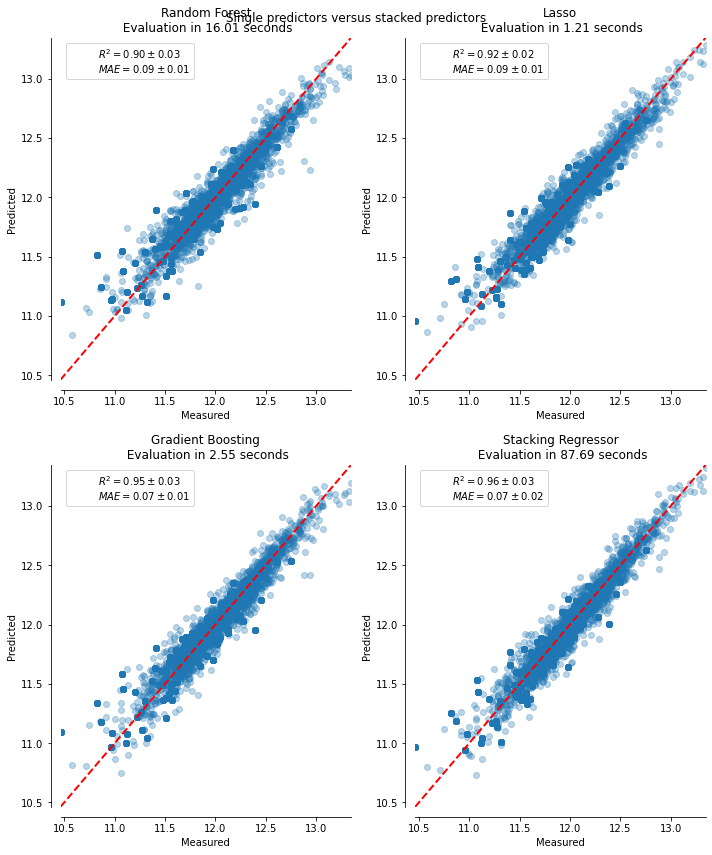

In [77]:
def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot(
        [y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "--r", linewidth=2
    )
    ax.scatter(y_true, y_pred, alpha=0.3)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel("Measured")
    ax.set_ylabel("Predicted")
    extra = plt.Rectangle(
        (0, 0), 0, 0, fc="w", fill=False, edgecolor="none", linewidth=0
    )
    ax.legend([extra], [scores], loc="upper left")
    title = title + "\n Evaluation in {:.2f} seconds".format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(2, 2, figsize=(10, 12))
axs = np.ravel(axs)

for ax, (name, est) in zip(
    axs, estimators + [("Stacking Regressor", stacking_regressor)]
):
    start_time = time.time()
    score = cross_validate(
        est, X, y, scoring=["r2", "neg_mean_absolute_error"], n_jobs=2, verbose=1
    )
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X, y, n_jobs=2, verbose=0)

    plot_regression_results(
        ax,
        y,
        y_pred,
        name,
        (r"$R^2={:.2f} \pm {:.2f}$" + "\n" + r"$MAE={:.2f} \pm {:.2f}$").format(
            np.max(score["test_r2"]),
            np.std(score["test_r2"]),
            -np.max(score["test_neg_mean_absolute_error"]),
            np.std(score["test_neg_mean_absolute_error"]),
        ),
        elapsed_time,
    )

plt.suptitle("Single predictors versus stacked predictors")
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [78]:
## Load models
import pickle

with open("Pickle_SVR.pkl" , 'rb') as file:  
     svm = pickle.load(file)
        
with open("scaler.pkl" , 'rb') as file:  
     sc = pickle.load(file)

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVR from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.0.2. This might lead to breaking

In [79]:
scores = pd.DataFrame()
scores['scores'] = [lasso_score, rand_score, xg_score]
scores['rmse'] = [lasso_rmse, rand_rmse, xg_rmse]
scores['model']= ['Lasso','RandomForest','XGBoost']
scores

,scores,rmse,model
0,0.933876,0.105840,Lasso
1,0.973152,0.025834,RandomForest
2,0.981134,0.063490,XGBoost


(0.9, 0.99)

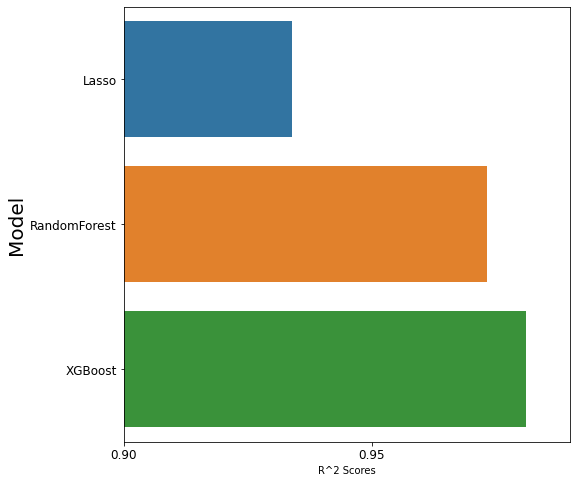

In [80]:
plt.figure(figsize=(8,8))

b = sns.barplot(y = scores['model'], x = scores['scores'])

b.set_xlabel("R^2 Scores")
b.set_ylabel("Model",fontsize = 20)
b.tick_params(labelsize = 12)
b.set_xticks([0.8,0.9, 0.95])
b.set_xlim(0.9,0.99)

# plt.savefig('./Figures/model_scores', bbox_inches = 'tight', dpi=350)


In [81]:
scores["rmse"]

0    0.105840
1    0.025834
2    0.063490
Name: rmse, dtype: float64

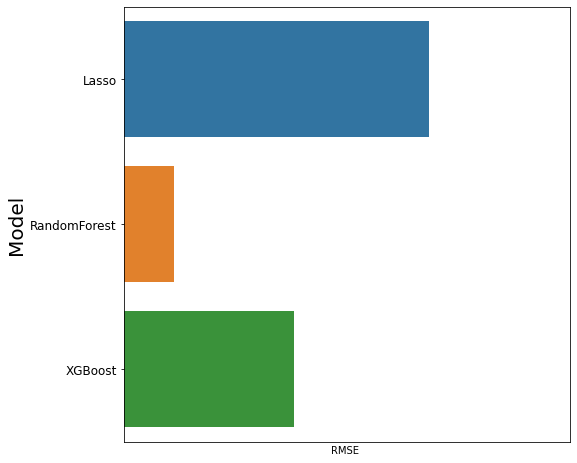

In [82]:
plt.figure(figsize=(8,8))

b = sns.barplot(y = scores['model'], x = scores['rmse'])

b.set_xlabel("RMSE ")
b.set_ylabel("Model",fontsize = 20)
b.tick_params(labelsize = 12)
b.set_xticks([6,6.5,7, 7.5, 8, 8.5, 9 ])
b.set_xlim(0.01,0.15)

plt.savefig('./Figures/model_rmse', bbox_inches = 'tight', dpi=350)
